# Data cleaning

In [344]:
import pandas as pd

In [345]:
df = pd.read_csv('./SBAnational.CSV', index_col='LoanNr_ChkDgt')

C:\Users\amr.elshamarka\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Raw data before any changes. 

In [346]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 899164 entries, 1000014003 to 9996003010
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Name               899150 non-null  object 
 1   City               899134 non-null  object 
 2   State              899150 non-null  object 
 3   Zip                899164 non-null  int64  
 4   Bank               897605 non-null  object 
 5   BankState          897598 non-null  object 
 6   NAICS              899164 non-null  int64  
 7   ApprovalDate       899164 non-null  object 
 8   ApprovalFY         899164 non-null  object 
 9   Term               899164 non-null  int64  
 10  NoEmp              899164 non-null  int64  
 11  NewExist           899028 non-null  float64
 12  CreateJob          899164 non-null  int64  
 13  RetainedJob        899164 non-null  int64  
 14  FranchiseCode      899164 non-null  int64  
 15  UrbanRural         899164 non-null  in

In [347]:
df.head(5)

,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
LoanNr_ChkDgt,,,,,,,,,,,,,,,,,,,,,
1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,240,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [348]:
df.describe()

,Zip,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural
count,899164.00,899164.00,899164.00,899164.00,899028.00,899164.00,899164.00,899164.00,899164.00
mean,53804.39,398660.95,110.77,11.41,1.28,8.43,10.80,2753.73,0.76
std,31184.16,263318.31,78.86,74.11,0.45,236.69,237.12,12758.02,0.65
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,27587.00,235210.00,60.00,2.00,1.00,0.00,0.00,1.00,0.00
50%,55410.00,445310.00,84.00,4.00,1.00,0.00,1.00,1.00,1.00
75%,83704.00,561730.00,120.00,10.00,2.00,1.00,4.00,1.00,1.00
max,99999.00,928120.00,569.00,9999.00,2.00,8800.00,9500.00,99999.00,2.00


In [349]:
df.describe(include=['object'])

,Name,City,State,Bank,BankState,ApprovalDate,ApprovalFY,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
count,899150,899134,899150,897605,897598,899164,899164,894636,896582,162699,896796,899164,899164,897167,899164,899164,899164
unique,779583,32581,51,5802,56,9859,70,18,8,6448,8472,118859,15,2,83165,22128,38326
top,SUBWAY,LOS ANGELES,CA,BANK OF AMERICA NATL ASSOC,CA,07-Jul-93,2006,N,N,13-Mar-10,31-Jul-95,"$50,000.00",$0.00,P I F,$0.00,"$50,000.00","$25,000.00"
freq,1269,11558,130619,86853,118116,1131,76040,420288,782822,734,10371,43787,899150,739609,737152,69394,49579


# 1- Checking data types and assigning the more suitable ones
# 2- Removing the dollar sign from numerical values

In [350]:
df['BalanceGross']=df['BalanceGross'].str.replace('$','')

df['BalanceGross']=df['BalanceGross'].str.replace(',','')

df['BalanceGross']=df['BalanceGross'].astype(float)

df['DisbursementGross'] = df['DisbursementGross'].str.replace(',', '')

df['DisbursementGross'] = df['DisbursementGross'].str.replace('$', '')

df['DisbursementGross'] = df['DisbursementGross'].astype(float)

df['ChgOffPrinGr'] = df['ChgOffPrinGr'].str.replace(',', '').str.replace('$', '')

df['ChgOffPrinGr'] = df['ChgOffPrinGr'].astype(float)

df['GrAppv'] = df['GrAppv'].str.replace(',', '').str.replace('$', '')

df['GrAppv'] = df['GrAppv'].astype(float)

df['SBA_Appv'] = df['SBA_Appv'].str.replace(',', '').str.replace('$', '')

df['SBA_Appv'] = df['SBA_Appv'].astype(float)

df['NewExist'] = df['NewExist'].astype(str)

df['Zip'] = df['Zip'].astype(str)

df['NAICS'] = df['NAICS'].astype(str)

df['UrbanRural'] = df['UrbanRural'].astype(str)

df.loc[df['FranchiseCode'] > 1, 'FranchiseCode'] = 2

df.loc[df['FranchiseCode'] == 0, 'FranchiseCode'] = 1

df['FranchiseCode'] = df['FranchiseCode'].astype(str)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 899164 entries, 1000014003 to 9996003010
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Name               899150 non-null  object 
 1   City               899134 non-null  object 
 2   State              899150 non-null  object 
 3   Zip                899164 non-null  object 
 4   Bank               897605 non-null  object 
 5   BankState          897598 non-null  object 
 6   NAICS              899164 non-null  object 
 7   ApprovalDate       899164 non-null  object 
 8   ApprovalFY         899164 non-null  object 
 9   Term               899164 non-null  int64  
 10  NoEmp              899164 non-null  int64  
 11  NewExist           899164 non-null  object 
 12  CreateJob          899164 non-null  int64  
 13  RetainedJob        899164 non-null  int64  
 14  FranchiseCode      899164 non-null  object 
 15  UrbanRural         899164 non-null  ob

In [351]:
df.describe()

,Term,NoEmp,CreateJob,RetainedJob,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
count,899164.00,899164.00,899164.00,899164.00,899164.00,899164.00,899164.00,899164.00,899164.00
mean,110.77,11.41,8.43,10.80,201154.02,2.99,13503.30,192686.98,149488.79
std,78.86,74.11,236.69,237.12,287640.85,1442.16,65152.29,283263.39,228414.56
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,200.00,100.00
25%,60.00,2.00,0.00,0.00,42000.00,0.00,0.00,35000.00,21250.00
50%,84.00,4.00,0.00,1.00,100000.00,0.00,0.00,90000.00,61250.00
75%,120.00,10.00,1.00,4.00,238000.00,0.00,0.00,225000.00,175000.00
max,569.00,9999.00,8800.00,9500.00,11446325.00,996262.00,3512596.00,5472000.00,5472000.00


# MIS_Status is the target variable showing which company had a loan default or paid in full. 

In [352]:
df['MIS_Status'].describe()

count     897167
unique         2
top        P I F
freq      739609
Name: MIS_Status, dtype: object

In [353]:
df = df[df['MIS_Status'].notna()]

In [354]:
df.shape

(897167, 26)

In [355]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 897167 entries, 1000014003 to 9996003010
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Name               897153 non-null  object 
 1   City               897137 non-null  object 
 2   State              897154 non-null  object 
 3   Zip                897167 non-null  object 
 4   Bank               895661 non-null  object 
 5   BankState          895654 non-null  object 
 6   NAICS              897167 non-null  object 
 7   ApprovalDate       897167 non-null  object 
 8   ApprovalFY         897167 non-null  object 
 9   Term               897167 non-null  int64  
 10  NoEmp              897167 non-null  int64  
 11  NewExist           897167 non-null  object 
 12  CreateJob          897167 non-null  int64  
 13  RetainedJob        897167 non-null  int64  
 14  FranchiseCode      897167 non-null  object 
 15  UrbanRural         897167 non-null  ob

In [356]:
pd.options.display.float_format = '{:.2f}'.format

df.describe()

,Term,NoEmp,CreateJob,RetainedJob,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
count,897167.00,897167.00,897167.00,897167.00,897167.00,897167.00,897167.00,897167.00,897167.00
mean,110.85,11.41,8.44,10.81,201598.03,3.00,13527.21,193059.52,149780.70
std,78.90,73.79,236.95,237.38,287806.62,1443.77,65209.86,283433.11,228559.98
min,0.00,0.00,0.00,0.00,4000.00,0.00,0.00,1000.00,500.00
25%,60.00,2.00,0.00,0.00,42492.00,0.00,0.00,35000.00,21250.00
50%,84.00,4.00,0.00,1.00,100000.00,0.00,0.00,90000.00,62050.00
75%,120.00,10.00,1.00,4.00,239000.00,0.00,0.00,225000.00,175000.00
max,569.00,9999.00,8800.00,9500.00,11446325.00,996262.00,3512596.00,5472000.00,5472000.00


In [357]:
df.describe(include=['object'])

,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,NewExist,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,MIS_Status
count,897153,897137,897154,897167,895661,895654,897167,897167,897167,897167,897167,897167,892647,894589,162438,894992,897167
unique,778679,32566,51,33602,5801,56,1312,9836,65,4,2,3,18,8,6444,8468,2
top,SUBWAY,LOS ANGELES,CA,10001,BANK OF AMERICA NATL ASSOC,CA,0,07-Jul-93,2006,1.0,1,1,N,N,13-Mar-10,31-Jul-95,P I F
freq,1269,11550,130488,931,86773,118034,201667,1130,75756,643446,845435,469281,419252,780997,733,10364,739609


# Analyzing categorical columns to detect un necessary  levels, missing or NA values. 

In [358]:
df['LowDoc'].value_counts()

N    780997
Y    110171
0      1490
C       758
S       603
A       495
R        74
1         1
Name: LowDoc, dtype: int64

# Only Y for yes, N for no and 0 as undefined will be used to describe this column.

In [359]:
import numpy as np
df['LowDoc'] = df['LowDoc'].apply(lambda x: x if x in ['Y', 'N', '0'] else '0')
df['LowDoc'].value_counts()

N    780997
Y    110171
0      5999
Name: LowDoc, dtype: int64

In [360]:
df['RevLineCr'].value_counts()

N    419252
0    257431
Y    200660
T     15239
1        23
R        14
`        11
2         6
C         2
,         1
Q         1
A         1
3         1
.         1
4         1
7         1
-         1
5         1
Name: RevLineCr, dtype: int64

# Only Y for yes, N for no and 0 as undefined will be used to describe this column.

In [361]:
df['RevLineCr'] = df['RevLineCr'].apply(lambda x: x if x in ['Y', 'N', '0'] else '0')
df['RevLineCr'].value_counts()

N    419252
0    277255
Y    200660
Name: RevLineCr, dtype: int64

In [362]:
df['UrbanRural'].value_counts()

1    469281
0    322826
2    105060
Name: UrbanRural, dtype: int64

In [363]:
df['NewExist'].value_counts()

1.0    643446
2.0    252559
0.0      1028
nan       134
Name: NewExist, dtype: int64

# Only 1 for Existing, 2 for new business and 0 as undefined will be used to describe this column. 

In [364]:
df['NewExist'] = df['NewExist'].str.replace('1.0', '1')
df['NewExist'] = df['NewExist'].str.replace('2.0', '2')
df['NewExist'] = df['NewExist'].str.replace('0.0', '0')
df['NewExist'] = df['NewExist'].apply(lambda x: x if x in ['1', '2', '0'] else '0')
df['NewExist'].value_counts()

1    643446
2    252559
0      1162
Name: NewExist, dtype: int64

In [365]:
df['NAICS'].value_counts()

0         201667
722110     27941
722211     19435
811111     14539
621210     14034
           ...  
315240         1
524192         1
316212         1
925120         1
112420         1
Name: NAICS, Length: 1312, dtype: int64

# NAICS representing the industry type by the first two digits. 

In [366]:
df.loc[df['NAICS'] == '0', 'NAICS'] = '00000'
df['NAICS'].value_counts()

00000     201667
722110     27941
722211     19435
811111     14539
621210     14034
           ...  
315240         1
524192         1
316212         1
925120         1
112420         1
Name: NAICS, Length: 1312, dtype: int64

In [367]:
df['NAICS'] = df['NAICS'].str[:-4]
df['NAICS'].value_counts()

0     201667
44     84567
81     72395
54     67922
72     67511
23     66492
62     55264
42     48673
45     42408
33     38206
56     32529
48     20198
32     17905
71     14616
53     13588
31     11792
51     11362
52      9470
11      8995
61      6401
49      2210
21      1851
22       662
55       256
92       227
Name: NAICS, dtype: int64

# Description of 'NAICS' according to the two digits classification will be provided in the report.  

In [368]:
df.loc[df['NAICS'] == '32', 'NAICS'] = '31'
df.loc[df['NAICS'] == '33', 'NAICS'] = '31'
df['NAICS'].value_counts()

0     201667
44     84567
81     72395
54     67922
31     67903
72     67511
23     66492
62     55264
42     48673
45     42408
56     32529
48     20198
71     14616
53     13588
51     11362
52      9470
11      8995
61      6401
49      2210
21      1851
22       662
55       256
92       227
Name: NAICS, dtype: int64

In [622]:
df['City'].describe()

count          897137
unique          32566
top       LOS ANGELES
freq            11550
Name: City, dtype: object

In [624]:
df['City'].value_counts()

LOS ANGELES      11550
HOUSTON          10229
NEW YORK          7834
CHICAGO           6009
MIAMI             5594
                 ...  
WITHIAMSVILLE        1
HEPHZEBAH            1
GRATZ                1
Harrison Twp.        1
SCIPIO CENTER        1
Name: City, Length: 32566, dtype: int64

In [623]:
df['City'].isna().sum()

30

In [627]:
df['State'].describe()

count     897154
unique        51
top           CA
freq      130488
Name: State, dtype: object

In [628]:
df['State'].isna().sum()

13

In [629]:
df['Bank'].describe()

count                         895661
unique                          5801
top       BANK OF AMERICA NATL ASSOC
freq                           86773
Name: Bank, dtype: object

In [630]:
df['Bank'].isna().sum()

1506

In [631]:
df['BankState'].describe()

count     895654
unique        56
top           CA
freq      118034
Name: BankState, dtype: object

In [632]:
df['BankState'].isna().sum()

1513

# Removing Null Values

In [640]:
df = df[df['City'].notna()]
df = df[df['State'].notna()]
df = df[df['Bank'].notna()]
df = df[df['BankState'].notna()]

In [641]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 895613 entries, 1000014003 to 9996003010
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Name               895599 non-null  object 
 1   City               895613 non-null  object 
 2   State              895613 non-null  object 
 3   Zip                895613 non-null  object 
 4   Bank               895613 non-null  object 
 5   BankState          895613 non-null  object 
 6   NAICS              895613 non-null  object 
 7   ApprovalDate       895613 non-null  object 
 8   ApprovalFY         895613 non-null  object 
 9   Term               895613 non-null  int64  
 10  NoEmp              895613 non-null  object 
 11  NewExist           895613 non-null  object 
 12  CreateJob          895613 non-null  int64  
 13  RetainedJob        895613 non-null  int64  
 14  FranchiseCode      895613 non-null  object 
 15  UrbanRural         895613 non-null  ob

In [369]:
df.describe(include=['object'])

,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,NewExist,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,MIS_Status
count,897153,897137,897154,897167,895661,895654,897167,897167,897167,897167,897167,897167,897167,897167,162438,894992,897167
unique,778679,32566,51,33602,5801,56,23,9836,65,3,2,3,3,3,6444,8468,2
top,SUBWAY,LOS ANGELES,CA,10001,BANK OF AMERICA NATL ASSOC,CA,0,07-Jul-93,2006,1,1,1,N,N,13-Mar-10,31-Jul-95,P I F
freq,1269,11550,130488,931,86773,118034,201667,1130,75756,643446,845435,469281,419252,780997,733,10364,739609


In [370]:
df['MIS_Status'].value_counts()

P I F     739609
CHGOFF    157558
Name: MIS_Status, dtype: int64

# Imbalance in the target variable 

In [371]:
df['MIS_Status'].value_counts(normalize=True)

P I F    0.82
CHGOFF   0.18
Name: MIS_Status, dtype: float64

d= {'P I F' : False, 'CHGOFF' : True}
df['MIS_Status'] = df['MIS_Status'].map(d)
df['MIS_Status'].value_counts()

In [372]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Starting Univariate Visualization of numerical variables.

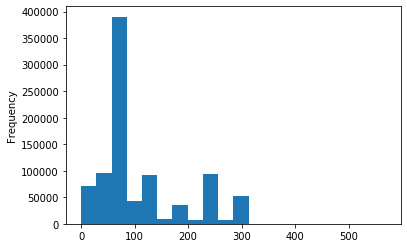

In [373]:
df['Term'].plot(bins=20, kind="hist", stacked=True)

(array([1.67630e+05, 4.33219e+05, 1.00308e+05, 4.12600e+04, 1.02286e+05,
        5.22720e+04, 1.57000e+02, 2.80000e+01, 5.00000e+00, 2.00000e+00]),
 array([  0. ,  56.9, 113.8, 170.7, 227.6, 284.5, 341.4, 398.3, 455.2,
        512.1, 569. ]),
 <a list of 10 Patch objects>)

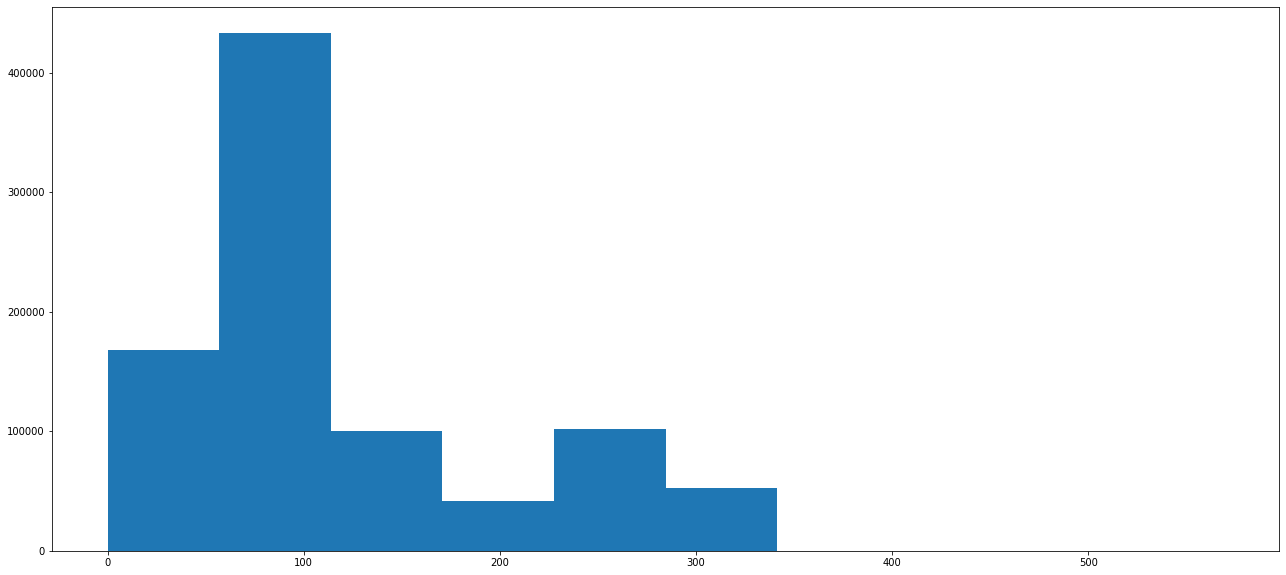

In [374]:
plt.rcParams['figure.figsize'] = [22, 10]
plt.hist(df['Term'])

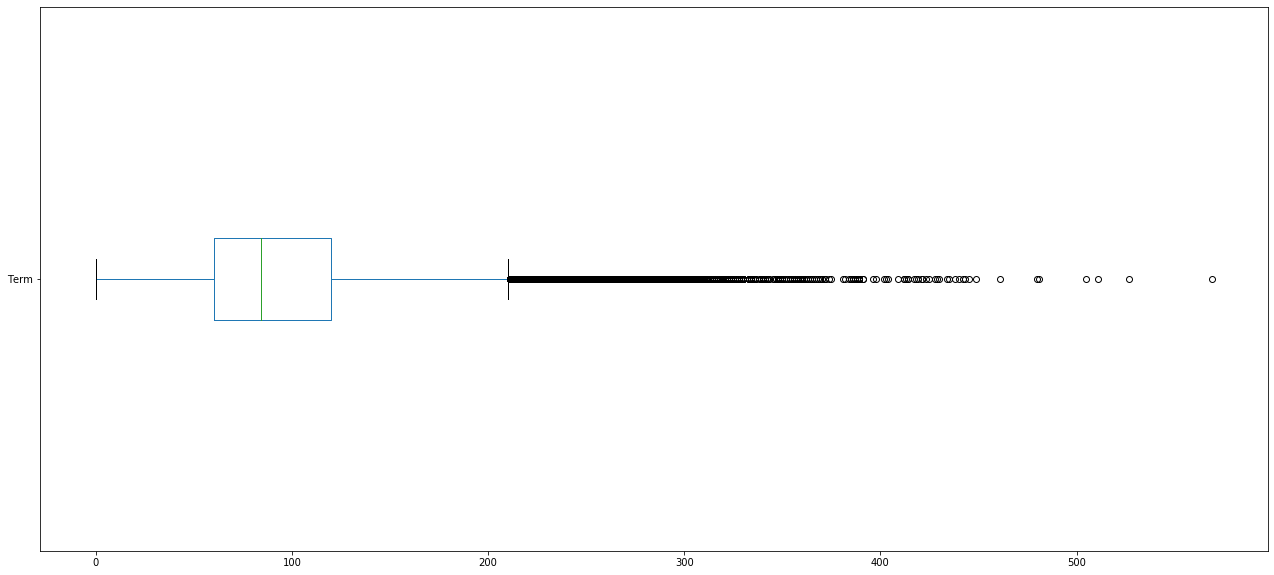

In [375]:
df['Term'].plot(kind="box", vert=False)

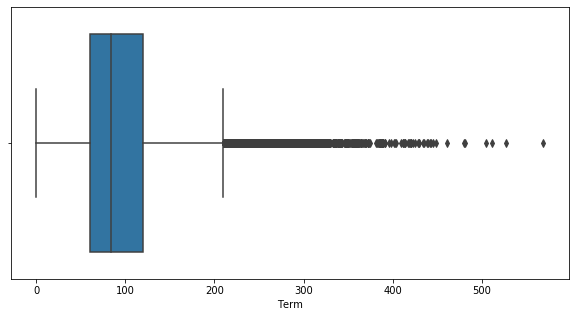

In [376]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Term', data=df)

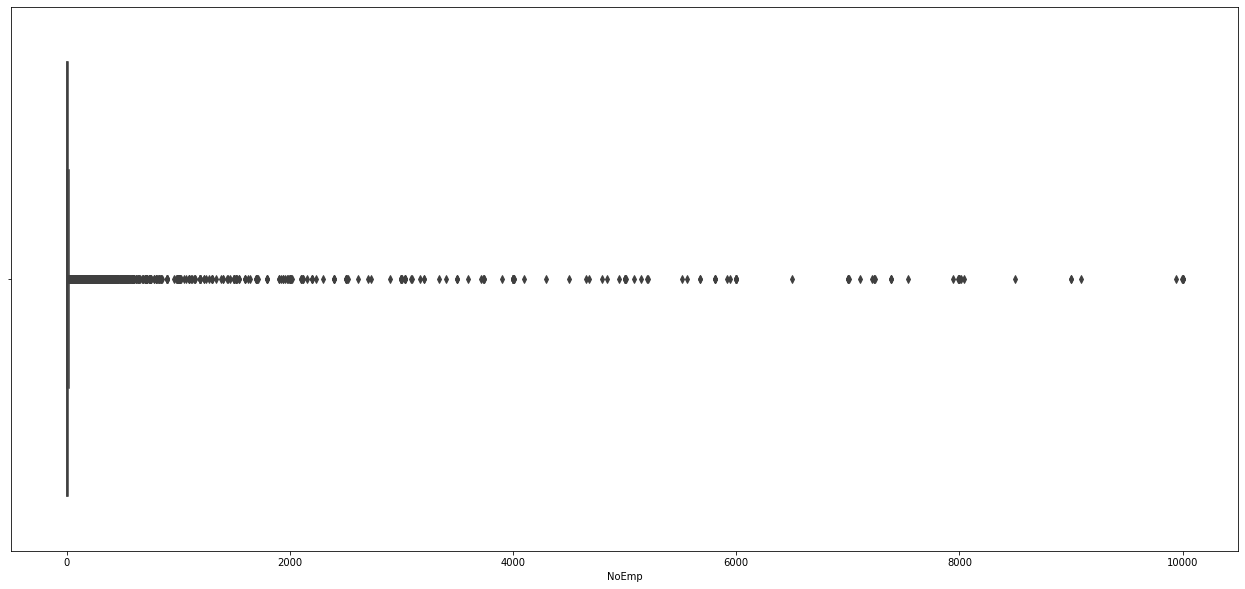

In [377]:
sns.boxplot(x='NoEmp', data=df)

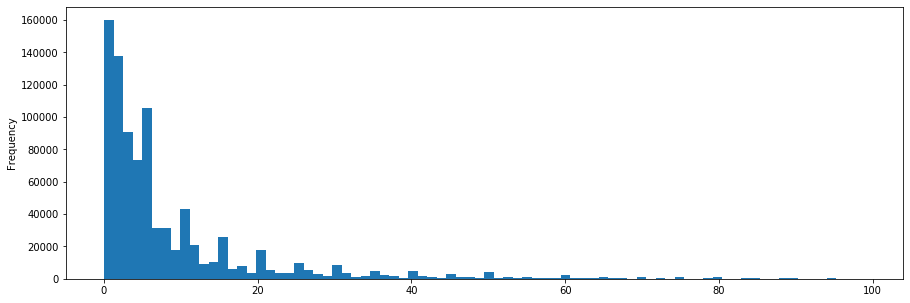

In [378]:
plt.figure(figsize=(15,5))
df['NoEmp'][df['NoEmp'] <100].plot(bins=80, kind="hist", stacked=True)

# Changing 'NoEmp' to string and limit the value levels to three depending on number of employees size (up to 50 =1, between 50 and 100 = 2, more than 100=3.

In [379]:
df.loc[df['NoEmp'] <= 50, 'NoEmp'] = 1
df.loc[(50 < df['NoEmp'])&(df['NoEmp'] < 100), 'NoEmp'] = 2 
df.loc[df['NoEmp'] >= 100, 'NoEmp'] = 3

In [380]:
df['NoEmp'] = df['NoEmp'].astype(str)

In [381]:
df['NoEmp'].describe()

count     897167
unique         3
top            1
freq      869878
Name: NoEmp, dtype: object

In [382]:
df.describe()

,Term,CreateJob,RetainedJob,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
count,897167.00,897167.00,897167.00,897167.00,897167.00,897167.00,897167.00,897167.00
mean,110.85,8.44,10.81,201598.03,3.00,13527.21,193059.52,149780.70
std,78.90,236.95,237.38,287806.62,1443.77,65209.86,283433.11,228559.98
min,0.00,0.00,0.00,4000.00,0.00,0.00,1000.00,500.00
25%,60.00,0.00,0.00,42492.00,0.00,0.00,35000.00,21250.00
50%,84.00,0.00,1.00,100000.00,0.00,0.00,90000.00,62050.00
75%,120.00,1.00,4.00,239000.00,0.00,0.00,225000.00,175000.00
max,569.00,8800.00,9500.00,11446325.00,996262.00,3512596.00,5472000.00,5472000.00


In [383]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 897167 entries, 1000014003 to 9996003010
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Name               897153 non-null  object 
 1   City               897137 non-null  object 
 2   State              897154 non-null  object 
 3   Zip                897167 non-null  object 
 4   Bank               895661 non-null  object 
 5   BankState          895654 non-null  object 
 6   NAICS              897167 non-null  object 
 7   ApprovalDate       897167 non-null  object 
 8   ApprovalFY         897167 non-null  object 
 9   Term               897167 non-null  int64  
 10  NoEmp              897167 non-null  object 
 11  NewExist           897167 non-null  object 
 12  CreateJob          897167 non-null  int64  
 13  RetainedJob        897167 non-null  int64  
 14  FranchiseCode      897167 non-null  object 
 15  UrbanRural         897167 non-null  ob

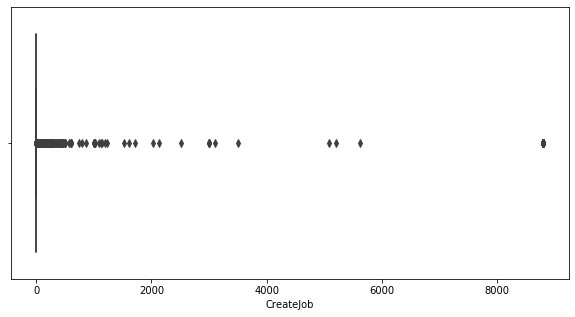

In [384]:
plt.figure(figsize=(10,5))
sns.boxplot(x='CreateJob', data=df)

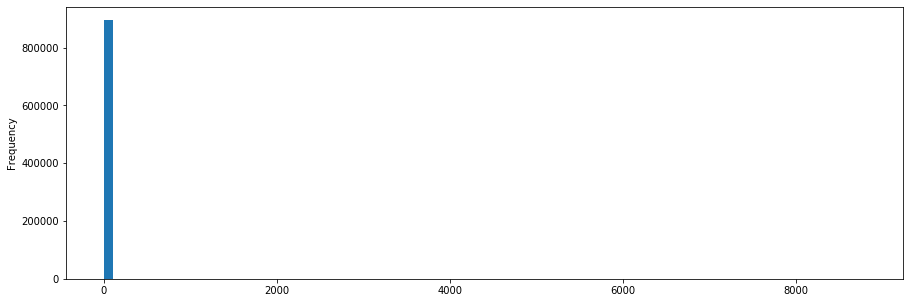

In [385]:
plt.figure(figsize=(15,5))
df['CreateJob'].plot(bins=80, kind="hist", stacked=True)

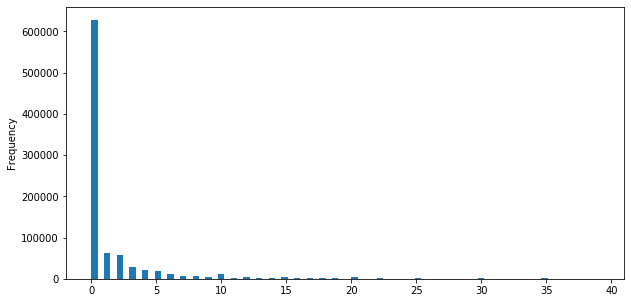

In [386]:
plt.figure(figsize=(10,5))
df['CreateJob'][df['CreateJob'] <40].plot(bins=80, kind="hist", stacked=True)

# 'CreateJobs' : 75% of the values are either 1 or 0 

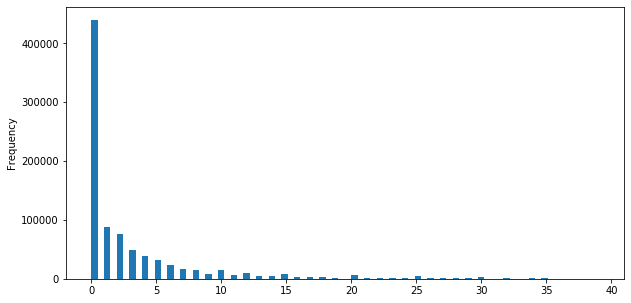

In [387]:
plt.figure(figsize=(10,5))
df['RetainedJob'][df['RetainedJob'] <40].plot(bins=80, kind="hist", stacked=True)

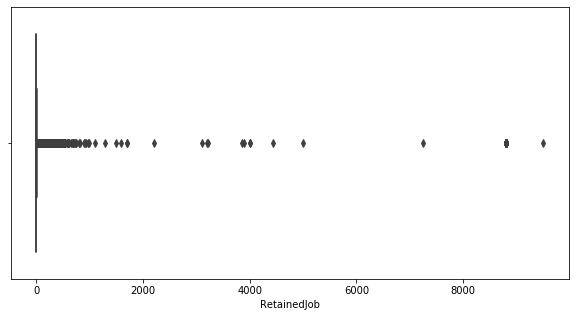

In [388]:
plt.figure(figsize=(10,5))
sns.boxplot(x='RetainedJob', data=df)

# RetainedJobs : 75% of the values are less than 4

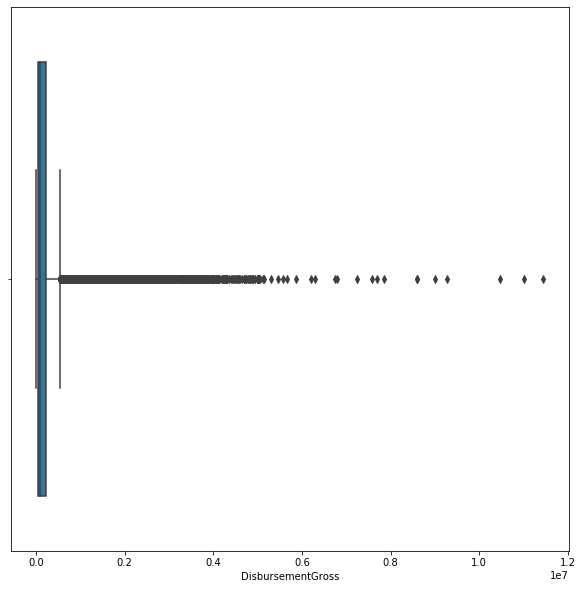

In [389]:
plt.figure(figsize=(10,10))
sns.boxplot(x='DisbursementGross', data=df)

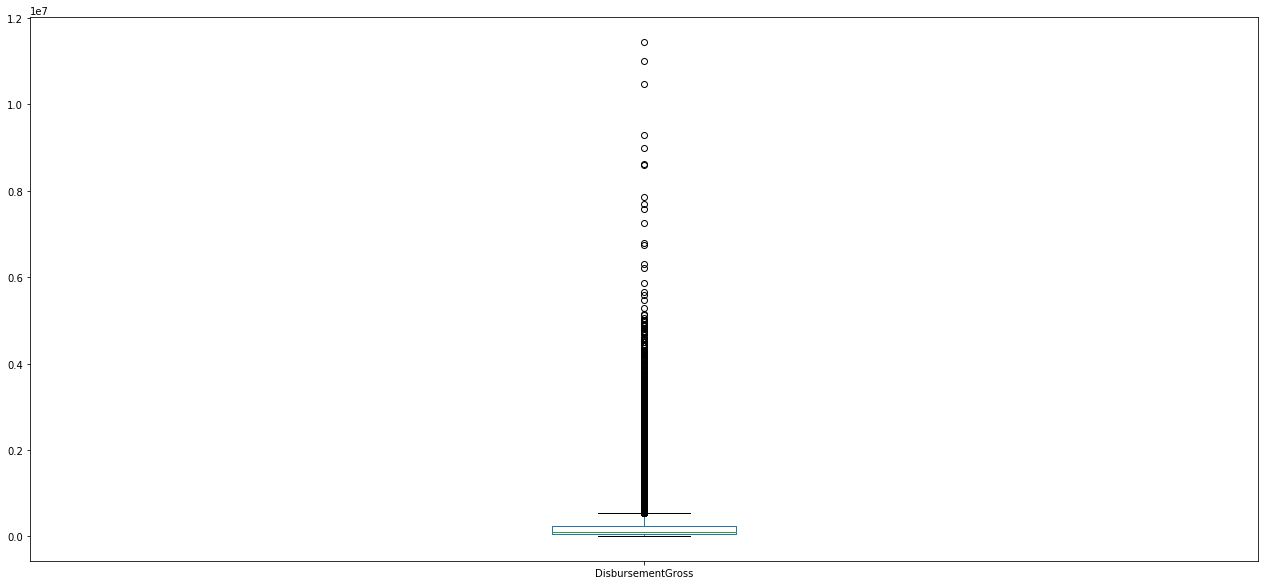

In [390]:
df['DisbursementGross'].plot(kind="box", vert=True)

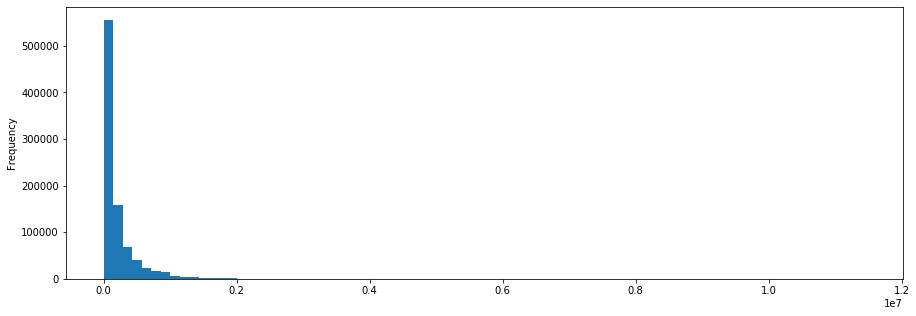

In [391]:
plt.figure(figsize=(15,5))
df['DisbursementGross'].plot(bins=80, kind="hist", stacked=True)

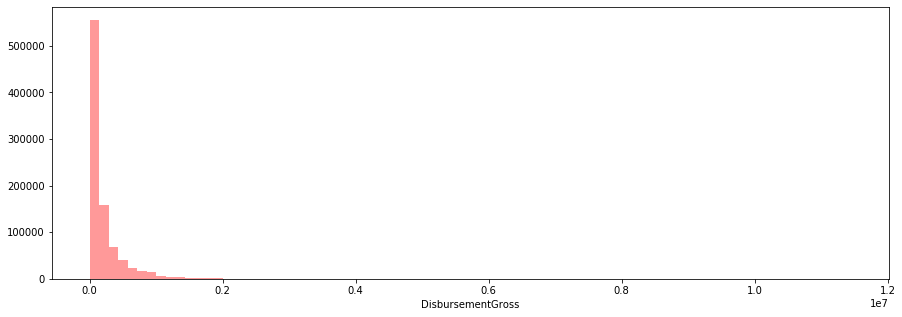

In [392]:
plt.figure(figsize=(15,5))
sns.distplot(df['DisbursementGross'], kde=False, color='red', bins=80)

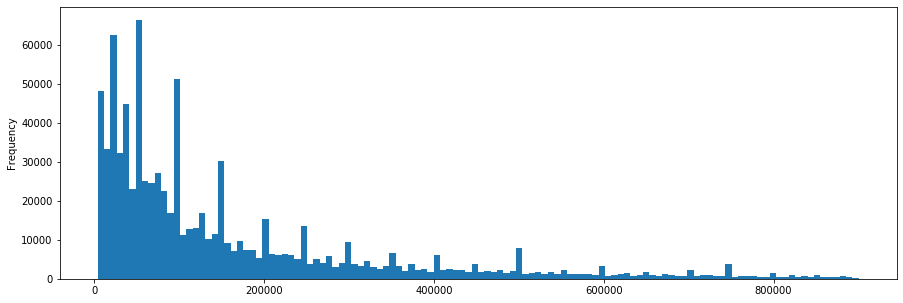

In [393]:
plt.figure(figsize=(15,5))
df['DisbursementGross'][df['DisbursementGross'] <900000].plot(bins=120, kind="hist", stacked=True)

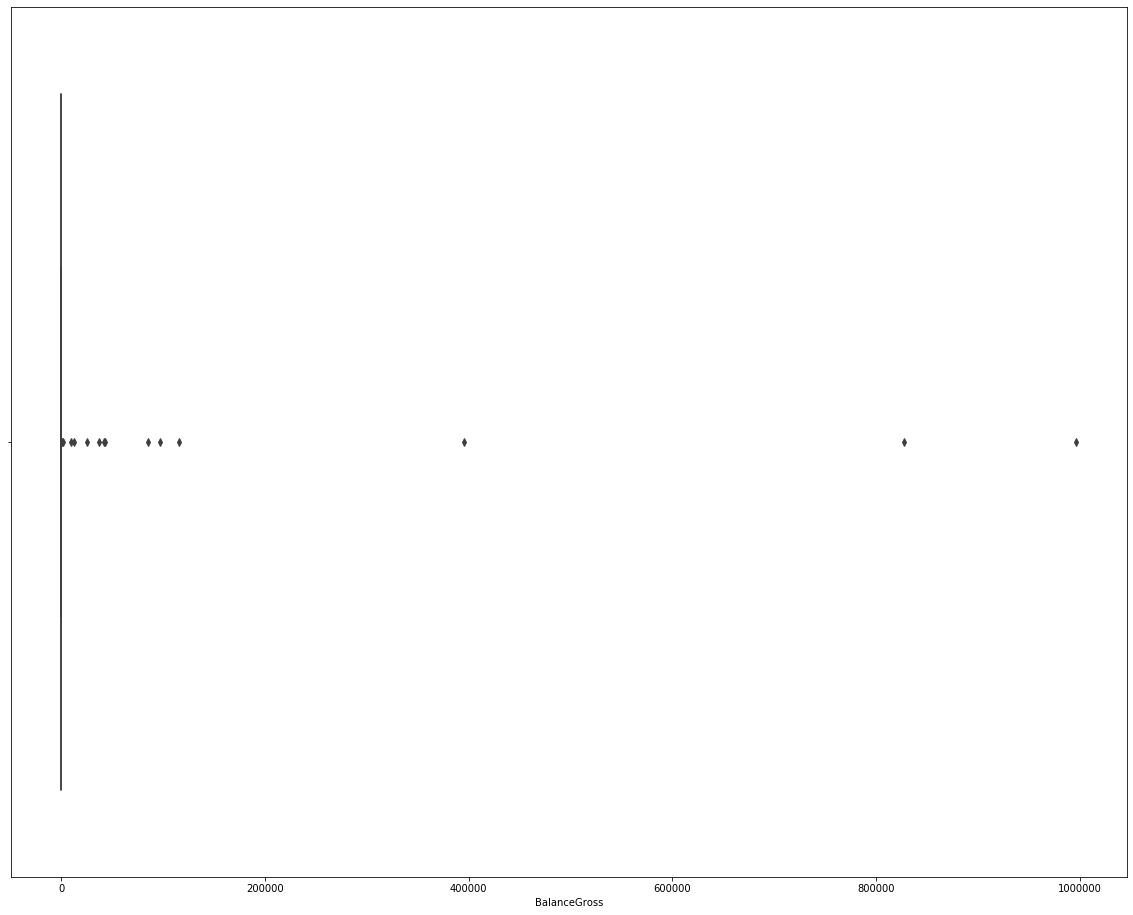

In [394]:
plt.figure(figsize=(20,16))
sns.boxplot(x='BalanceGross', data=df)

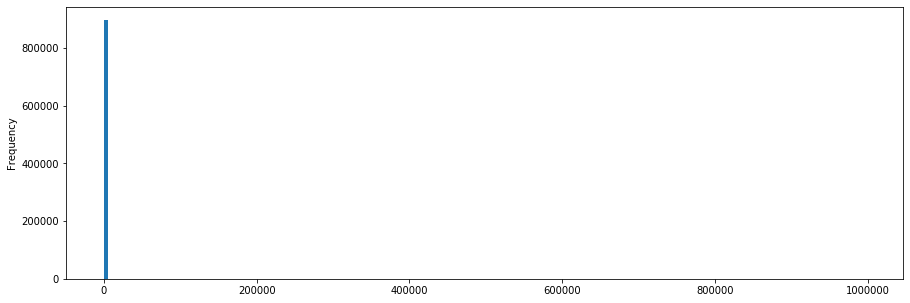

In [395]:
plt.figure(figsize=(15,5))
df['BalanceGross'].plot(bins=200, kind="hist", stacked=True)

In [396]:
df.describe()

,Term,CreateJob,RetainedJob,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
count,897167.00,897167.00,897167.00,897167.00,897167.00,897167.00,897167.00,897167.00
mean,110.85,8.44,10.81,201598.03,3.00,13527.21,193059.52,149780.70
std,78.90,236.95,237.38,287806.62,1443.77,65209.86,283433.11,228559.98
min,0.00,0.00,0.00,4000.00,0.00,0.00,1000.00,500.00
25%,60.00,0.00,0.00,42492.00,0.00,0.00,35000.00,21250.00
50%,84.00,0.00,1.00,100000.00,0.00,0.00,90000.00,62050.00
75%,120.00,1.00,4.00,239000.00,0.00,0.00,225000.00,175000.00
max,569.00,8800.00,9500.00,11446325.00,996262.00,3512596.00,5472000.00,5472000.00


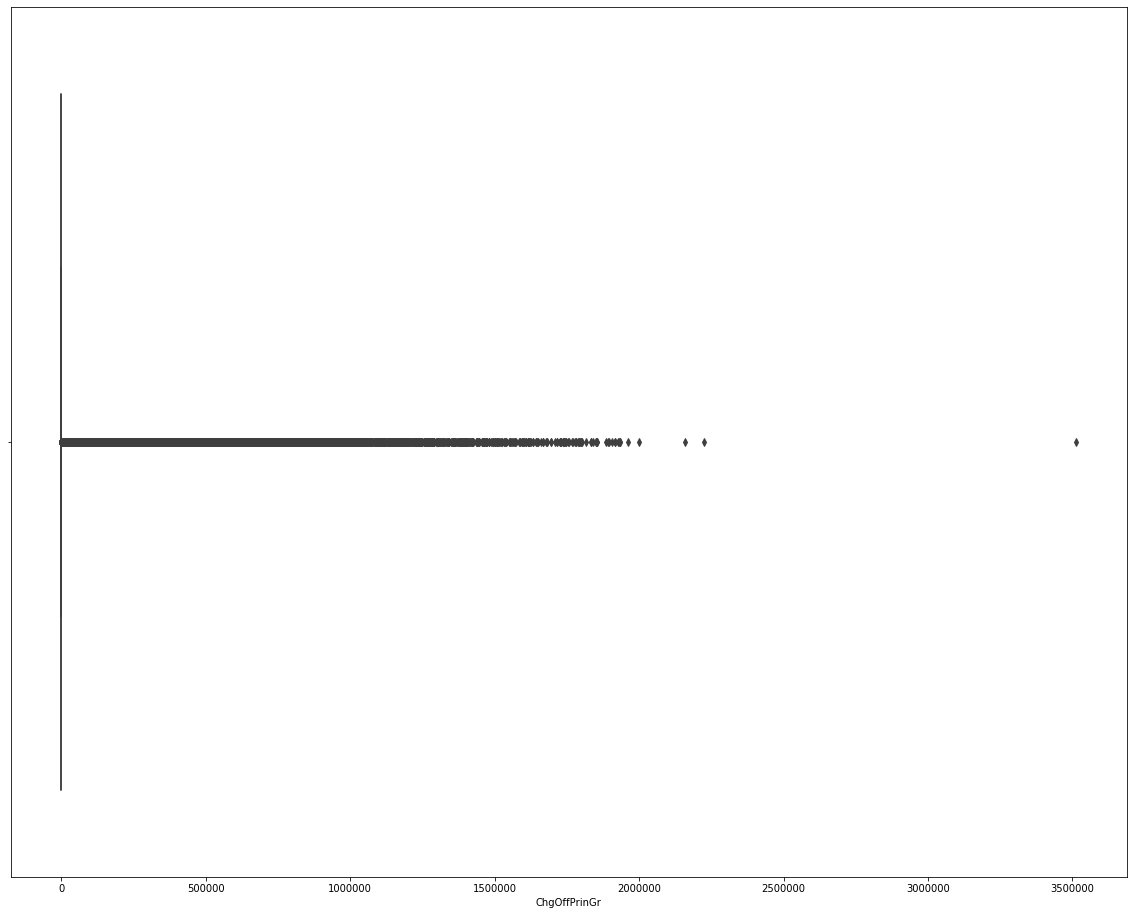

In [397]:
plt.figure(figsize=(20,16))
sns.boxplot(x='ChgOffPrinGr', data=df)

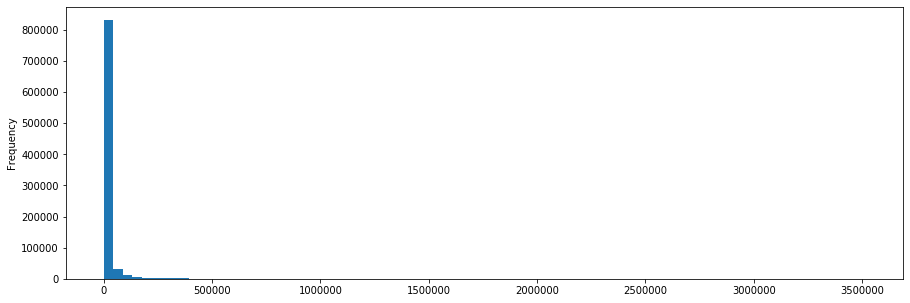

In [398]:
plt.figure(figsize=(15,5))
df['ChgOffPrinGr'].plot(bins=80, kind="hist", stacked=True)

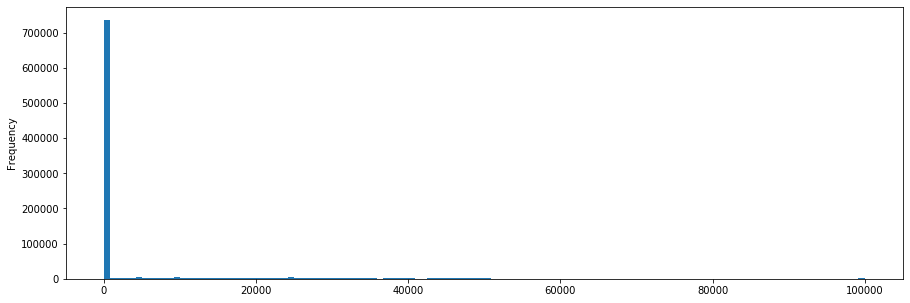

In [399]:
plt.figure(figsize=(15,5))
df['ChgOffPrinGr'][df['ChgOffPrinGr'] <100000].plot(bins=120, kind="hist", stacked=True)

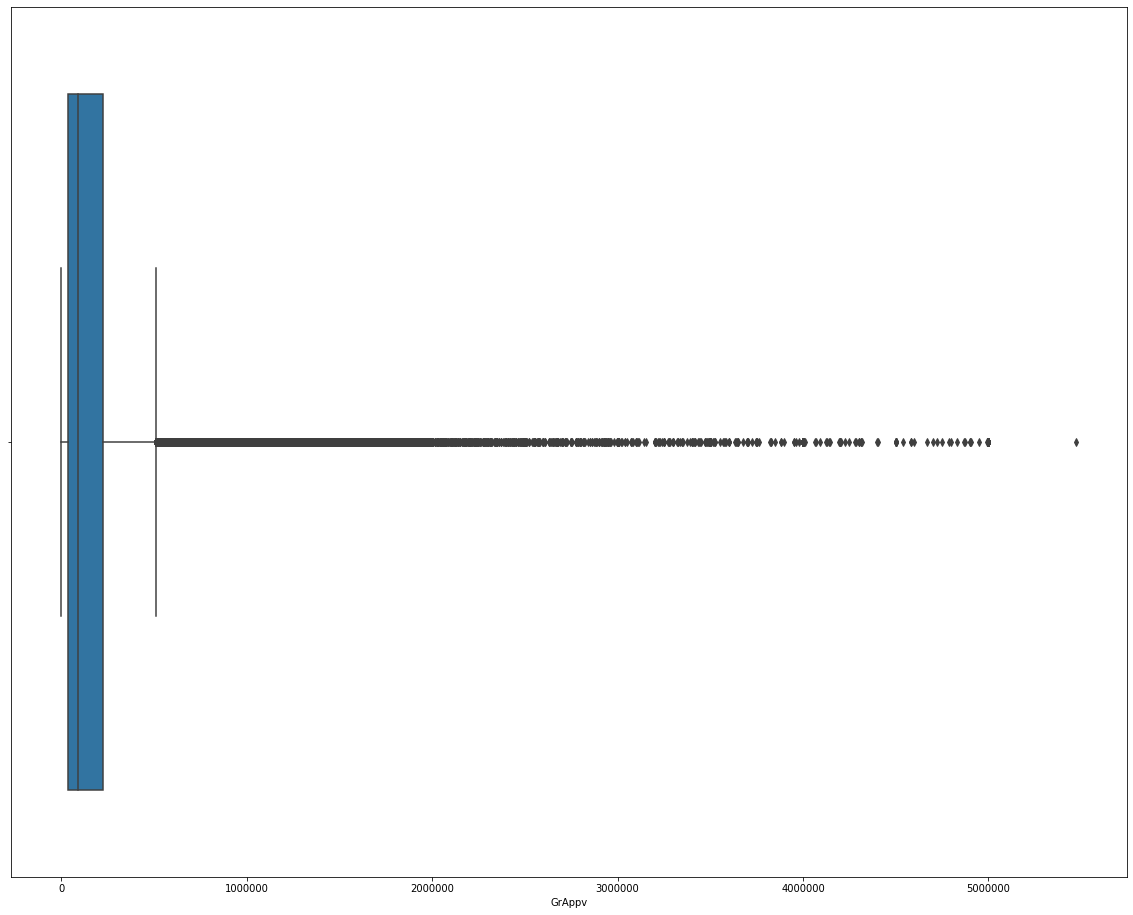

In [400]:
plt.figure(figsize=(20,16))
sns.boxplot(x='GrAppv', data=df)

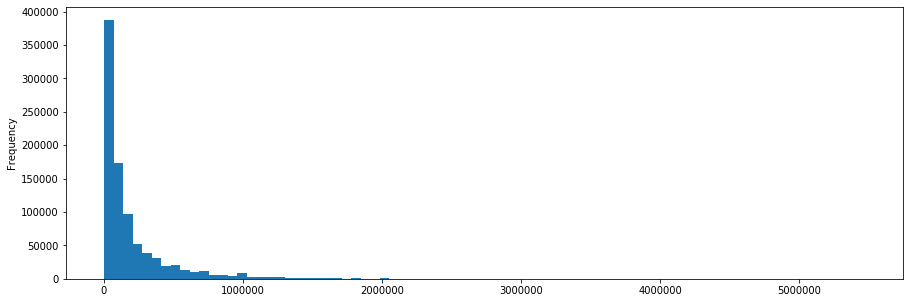

In [401]:
plt.figure(figsize=(15,5))
df['GrAppv'].plot(bins=80, kind="hist", stacked=True)

# Some discrepency in the data where 'DisbursementGross' is greater than 'GrAppv', could be a data entry mistake.

In [402]:
df[df['DisbursementGross']>df['GrAppv']].head(5)

,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
LoanNr_ChkDgt,,,,,,,,,,,,,,,,,,,,,
1000506000,WEYLAND CORPORATION,CAMARILLO,CA,93010,WELLS FARGO BANK NATL ASSOC,SD,61,07-Feb-06,2006,83,...,Y,N,NaN,28-Feb-06,438541.00,0.00,P I F,0.00,100000.00,50000.00
1000516003,CHICAGO BRICK UNLIMITED INC,MIAMI,FL,33186,"CITIBANK, N.A.",FL,23,07-Feb-06,2006,84,...,Y,N,NaN,28-Feb-06,51440.00,0.00,P I F,0.00,35000.00,17500.00
1000536009,HUTMACHER HOLDINGS INC,LEANDER,TX,78641,WELLS FARGO BANK NATL ASSOC,SD,54,07-Feb-06,2006,80,...,Y,N,NaN,31-May-06,63076.00,0.00,P I F,0.00,25000.00,12500.00
1000685001,ANYWHERE SPORTS PRODUCTIONS,Marina del Ray,CA,90292,WELLS FARGO BANK NATL ASSOC,SD,0,25-Mar-97,1997,84,...,Y,N,NaN,31-Oct-97,30570.00,0.00,P I F,0.00,25000.00,12500.00
1000756005,B&B DIPNETS,WASILLA,AK,99654,WELLS FARGO BANK NATL ASSOC,SD,31,07-Feb-06,2006,83,...,Y,N,NaN,28-Feb-06,78218.00,0.00,P I F,0.00,30000.00,15000.00


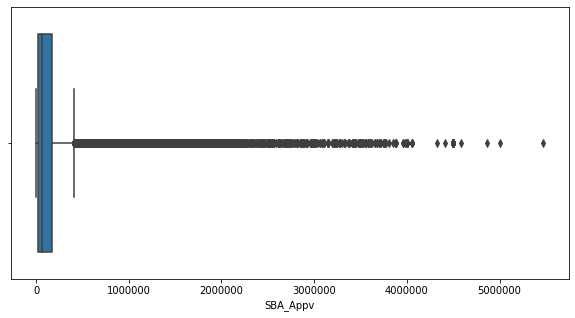

In [403]:
plt.figure(figsize=(10,5))
sns.boxplot(x='SBA_Appv', data=df)

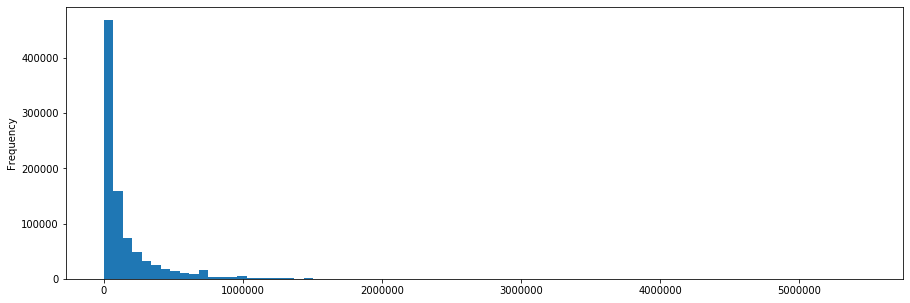

In [404]:
plt.figure(figsize=(15,5))
df['SBA_Appv'].plot(bins=80, kind="hist", stacked=True)

# Numerical columns visualization is showing data distribution skewed to the left.  

In [405]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 897167 entries, 1000014003 to 9996003010
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Name               897153 non-null  object 
 1   City               897137 non-null  object 
 2   State              897154 non-null  object 
 3   Zip                897167 non-null  object 
 4   Bank               895661 non-null  object 
 5   BankState          895654 non-null  object 
 6   NAICS              897167 non-null  object 
 7   ApprovalDate       897167 non-null  object 
 8   ApprovalFY         897167 non-null  object 
 9   Term               897167 non-null  int64  
 10  NoEmp              897167 non-null  object 
 11  NewExist           897167 non-null  object 
 12  CreateJob          897167 non-null  int64  
 13  RetainedJob        897167 non-null  int64  
 14  FranchiseCode      897167 non-null  object 
 15  UrbanRural         897167 non-null  ob

# Univariate visualization of categorical variables  

In [406]:
df['NoEmp'].describe()

count     897167
unique         3
top            1
freq      869878
Name: NoEmp, dtype: object

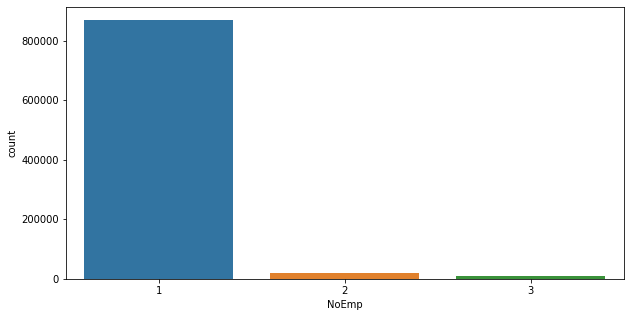

In [407]:
plt.figure(figsize=(10,5))
sns.countplot(x='NoEmp', data=df)

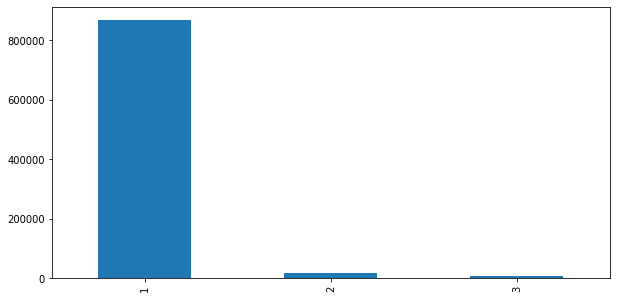

In [408]:
plt.figure(figsize=(10,5))
df['NoEmp'].value_counts().plot.bar()

In [409]:
df['NoEmp'].value_counts()

1    869878
2     18724
3      8565
Name: NoEmp, dtype: int64

In [410]:
df['NAICS'].describe()

count     897167
unique        23
top            0
freq      201667
Name: NAICS, dtype: object

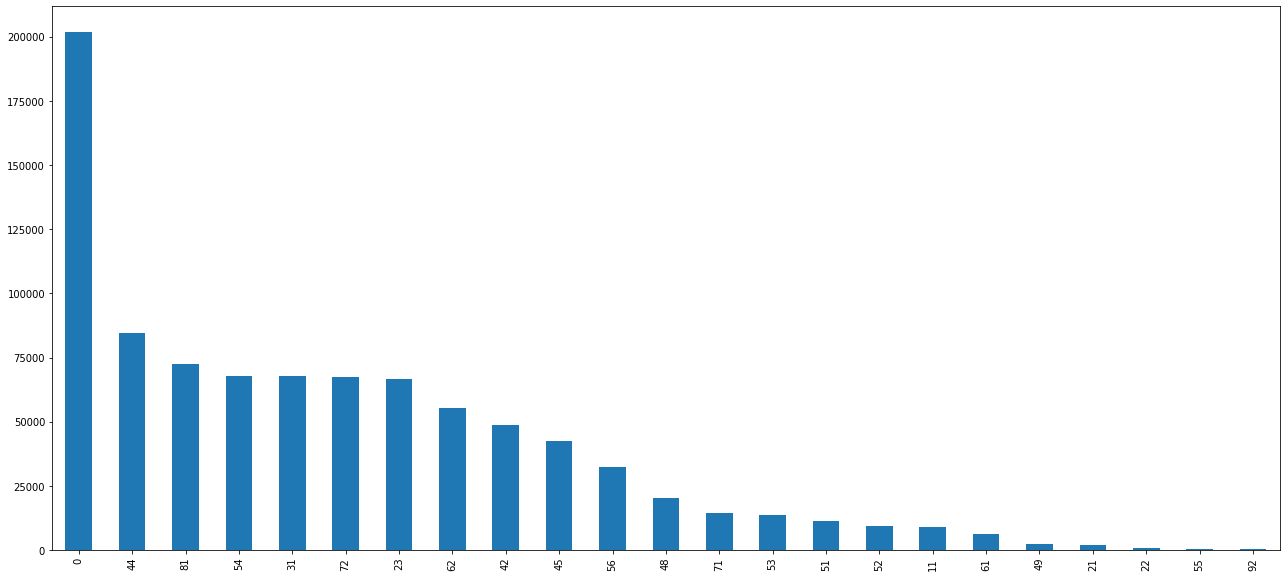

In [411]:
df['NAICS'].value_counts().plot.bar()

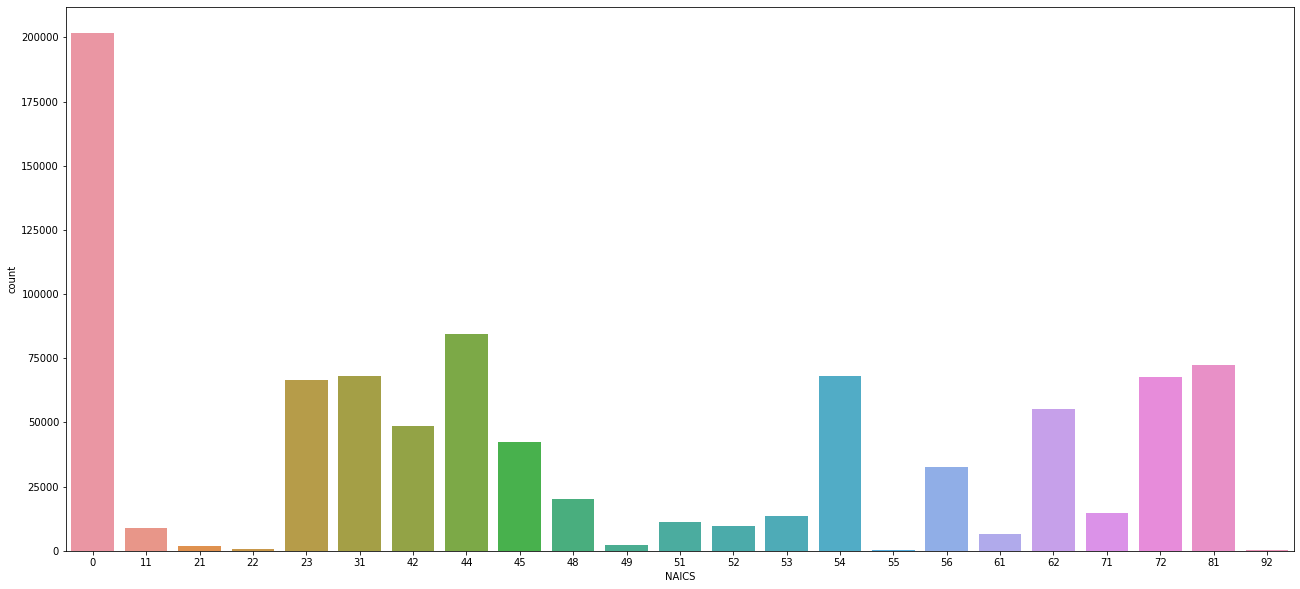

In [412]:
sns.countplot(x='NAICS', data=df)

# 0 value in 'NAICS' representing undefined industry type.

In [413]:
df['NAICS'].value_counts()

0     201667
44     84567
81     72395
54     67922
31     67903
72     67511
23     66492
62     55264
42     48673
45     42408
56     32529
48     20198
71     14616
53     13588
51     11362
52      9470
11      8995
61      6401
49      2210
21      1851
22       662
55       256
92       227
Name: NAICS, dtype: int64

In [414]:
df['NewExist'].describe()

count     897167
unique         3
top            1
freq      643446
Name: NewExist, dtype: object

In [415]:
df['NewExist'].value_counts()

1    643446
2    252559
0      1162
Name: NewExist, dtype: int64

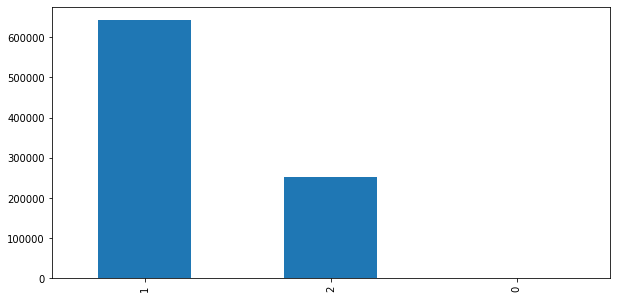

In [416]:
plt.figure(figsize=(10,5))
df['NewExist'].value_counts().plot.bar()

# 1= No Franchise, 2= Franchise

In [417]:
df['FranchiseCode'].describe()

count     897167
unique         2
top            1
freq      845435
Name: FranchiseCode, dtype: object

In [418]:
df['FranchiseCode'].value_counts()

1    845435
2     51732
Name: FranchiseCode, dtype: int64

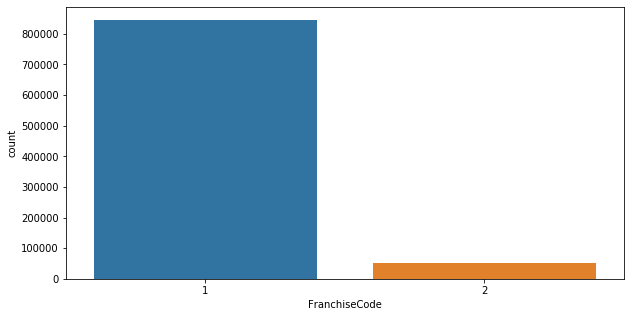

In [419]:
plt.figure(figsize=(10,5))
sns.countplot(x='FranchiseCode', data=df)

# 1= Urban, 2= Rural, 0= Undefined

In [420]:
df['UrbanRural'].describe()

count     897167
unique         3
top            1
freq      469281
Name: UrbanRural, dtype: object

In [421]:
df['UrbanRural'].value_counts()

1    469281
0    322826
2    105060
Name: UrbanRural, dtype: int64

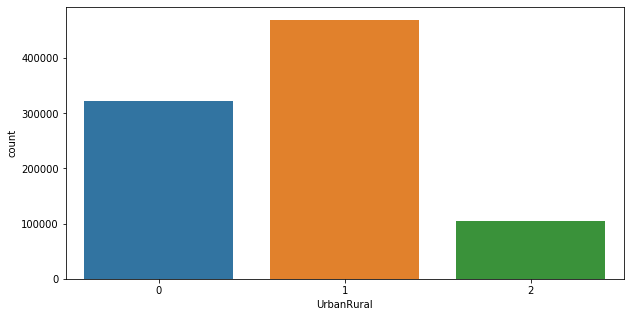

In [422]:
plt.figure(figsize=(10,5))
sns.countplot(x='UrbanRural', data=df)

# 'RevLineCr' , Y= Yes, N= No, 0= Undefined

In [423]:
df['RevLineCr'].describe()

count     897167
unique         3
top            N
freq      419252
Name: RevLineCr, dtype: object

In [424]:
df['RevLineCr'].value_counts()

N    419252
0    277255
Y    200660
Name: RevLineCr, dtype: int64

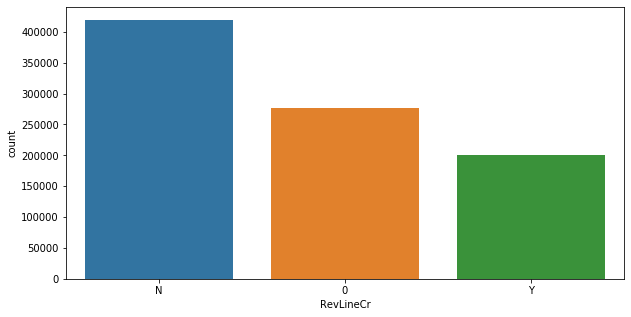

In [425]:
plt.figure(figsize=(10,5))
sns.countplot(x='RevLineCr', data=df)

# Y= Yes , N= No, 0= Undefined

In [426]:
df['LowDoc'].describe()

count     897167
unique         3
top            N
freq      780997
Name: LowDoc, dtype: object

In [427]:
df['LowDoc'].value_counts()

N    780997
Y    110171
0      5999
Name: LowDoc, dtype: int64

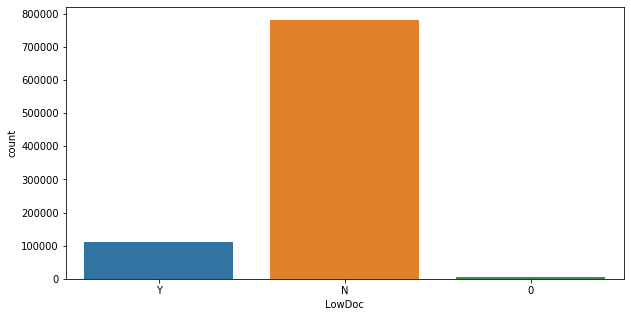

In [428]:
plt.figure(figsize=(10,5))
sns.countplot(x='LowDoc', data=df)

In [429]:
df.describe(include=['object'])

,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,NoEmp,NewExist,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,MIS_Status
count,897153,897137,897154,897167,895661,895654,897167,897167,897167,897167,897167,897167,897167,897167,897167,162438,894992,897167
unique,778679,32566,51,33602,5801,56,23,9836,65,3,3,2,3,3,3,6444,8468,2
top,SUBWAY,LOS ANGELES,CA,10001,BANK OF AMERICA NATL ASSOC,CA,0,07-Jul-93,2006,1,1,1,1,N,N,13-Mar-10,31-Jul-95,P I F
freq,1269,11550,130488,931,86773,118034,201667,1130,75756,869878,643446,845435,469281,419252,780997,733,10364,739609


# Bivariate analysis of  numerical columns with target variable 

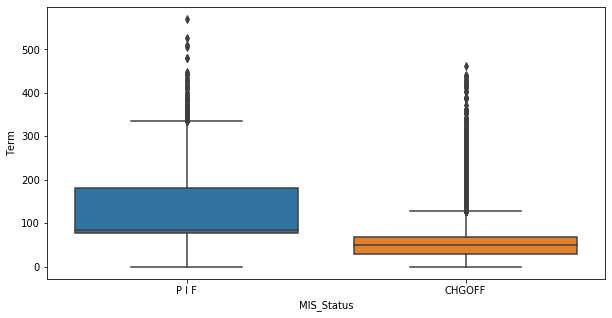

In [430]:
plt.figure(figsize=(10,5))
sns.boxplot(x='MIS_Status',y='Term', data=df)

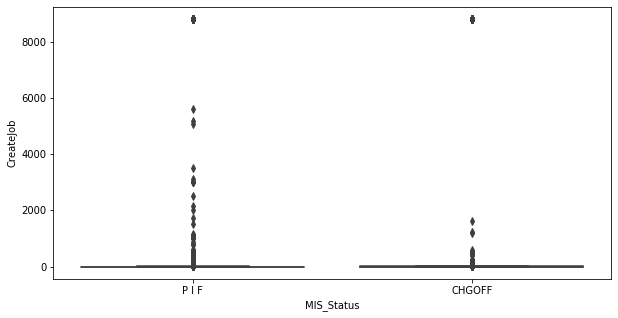

In [431]:
plt.figure(figsize=(10,5))
sns.boxplot(x='MIS_Status',y='CreateJob', data=df)

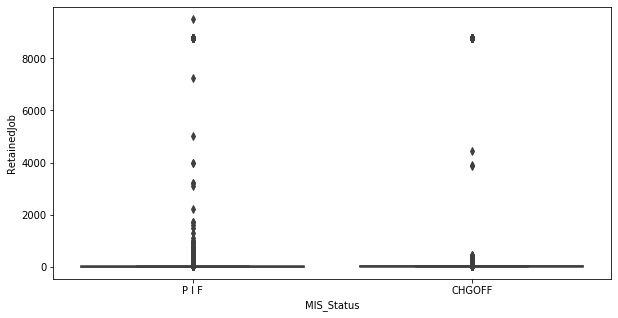

In [432]:
plt.figure(figsize=(10,5))
sns.boxplot(x='MIS_Status',y='RetainedJob', data=df)

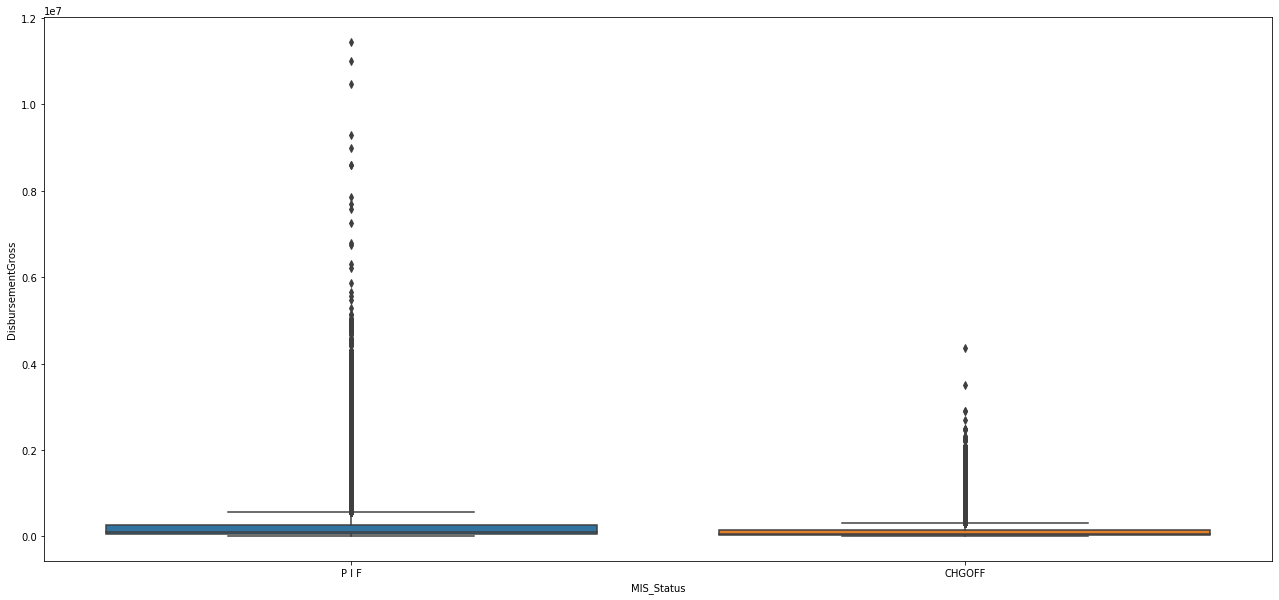

In [433]:
sns.boxplot(x='MIS_Status',y='DisbursementGross', data=df)

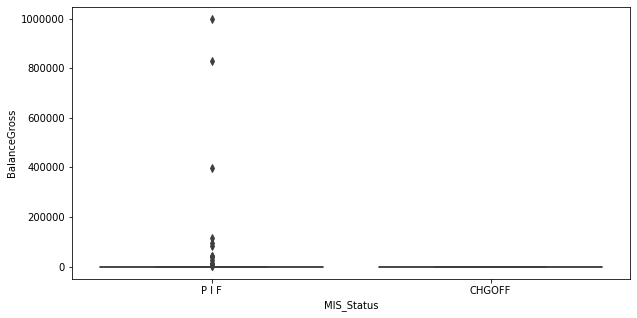

In [434]:
plt.figure(figsize=(10,5))
sns.boxplot(x='MIS_Status',y='BalanceGross', data=df)

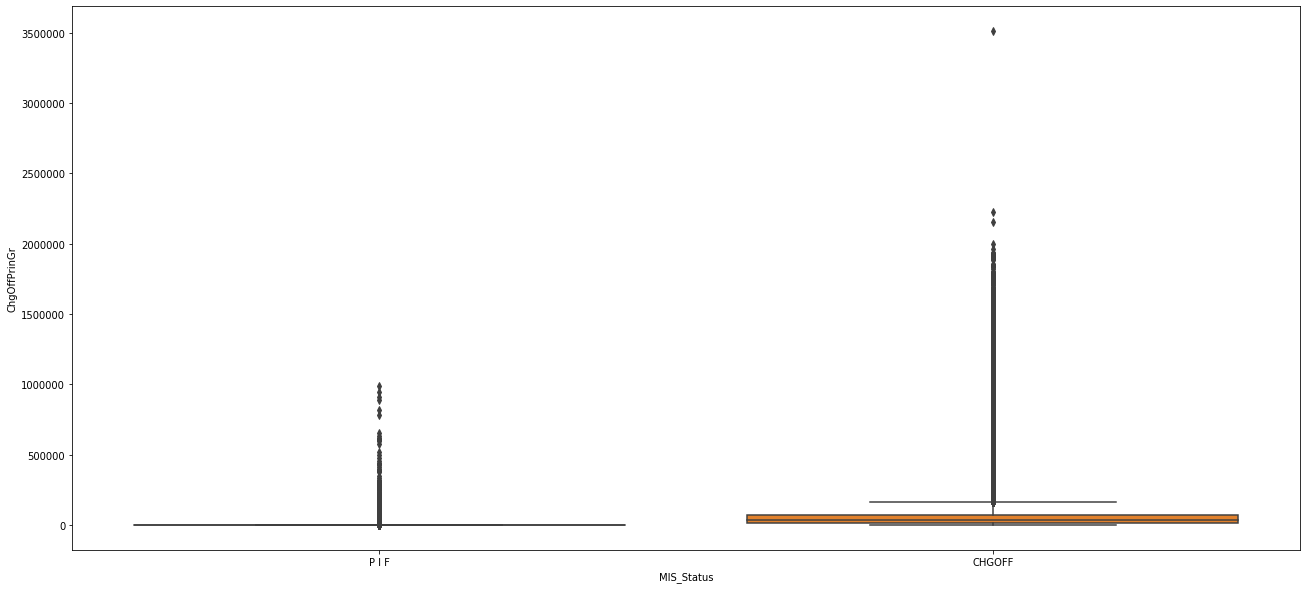

In [435]:
sns.boxplot(x='MIS_Status',y='ChgOffPrinGr', data=df)

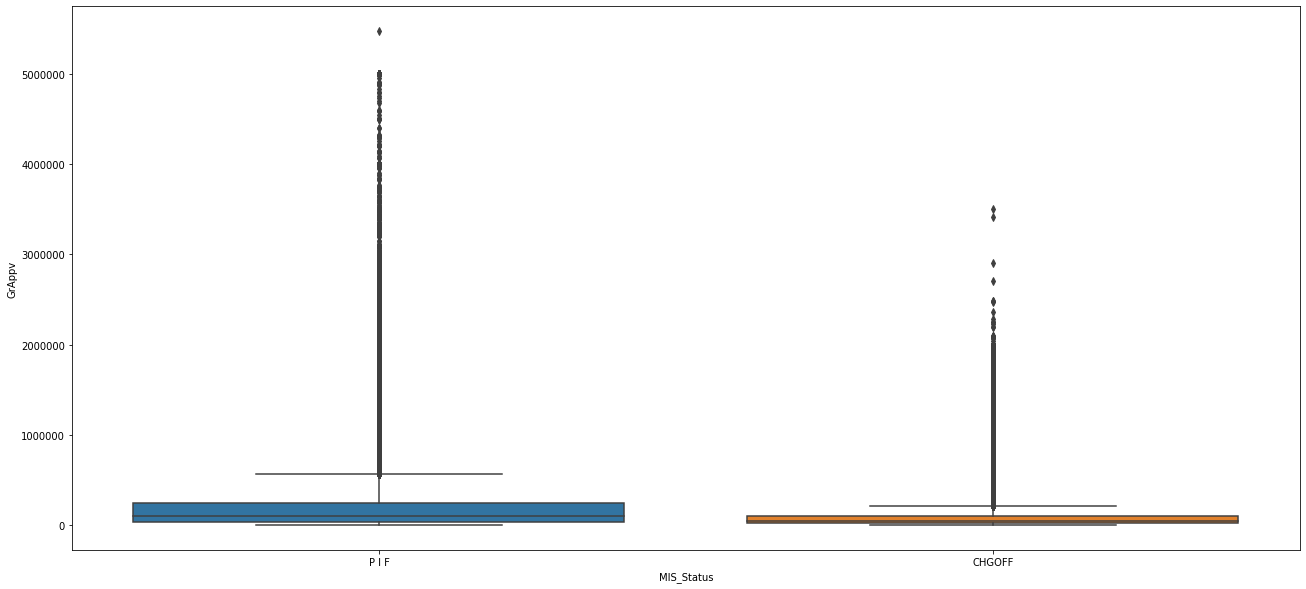

In [436]:
sns.boxplot(x='MIS_Status',y='GrAppv', data=df)

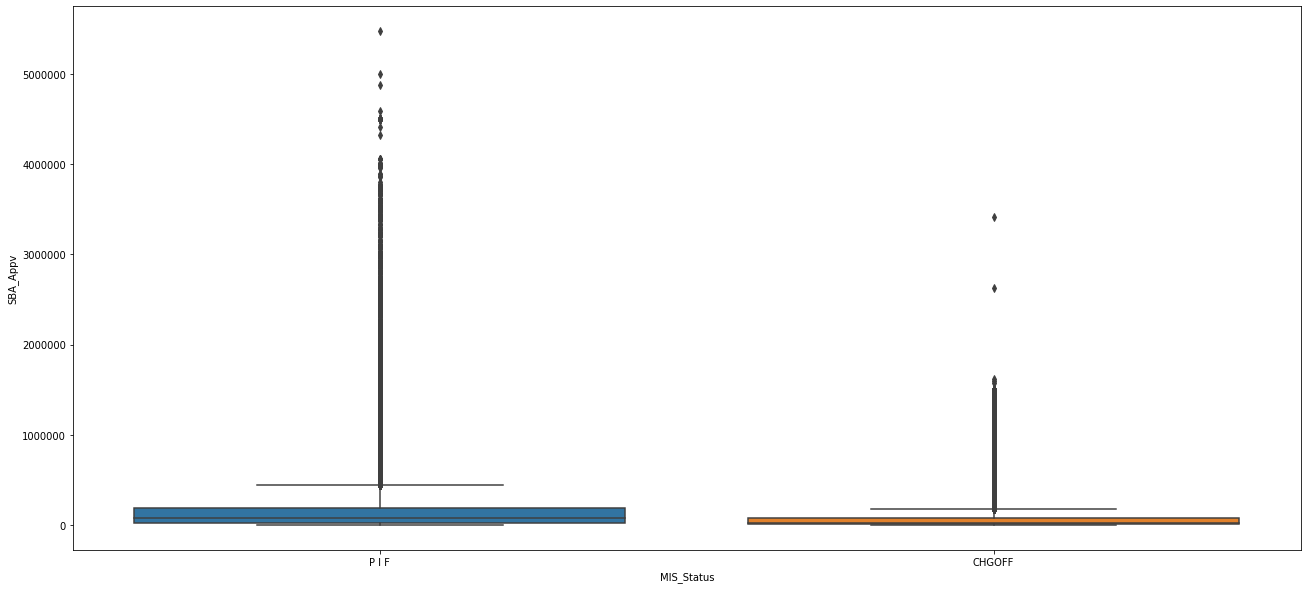

In [437]:
sns.boxplot(x='MIS_Status',y='SBA_Appv', data=df)

# Bivariate Analysis of categorical columns with target variable.

In [438]:
pd.crosstab(df['MIS_Status'], df['State'])

State,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
MIS_Status,,,,,,,,,,,,,,,,,,,,,
CHGOFF,281,1389,1064,3657,24160,3671,1703,387,394,11274,...,349,1994,13265,3316,2487,404,3268,2560,530,199
P I F,2122,6971,5269,13967,106328,16927,10424,1226,1799,29918,...,4079,7406,57136,15456,10720,5029,19987,18461,2755,2639


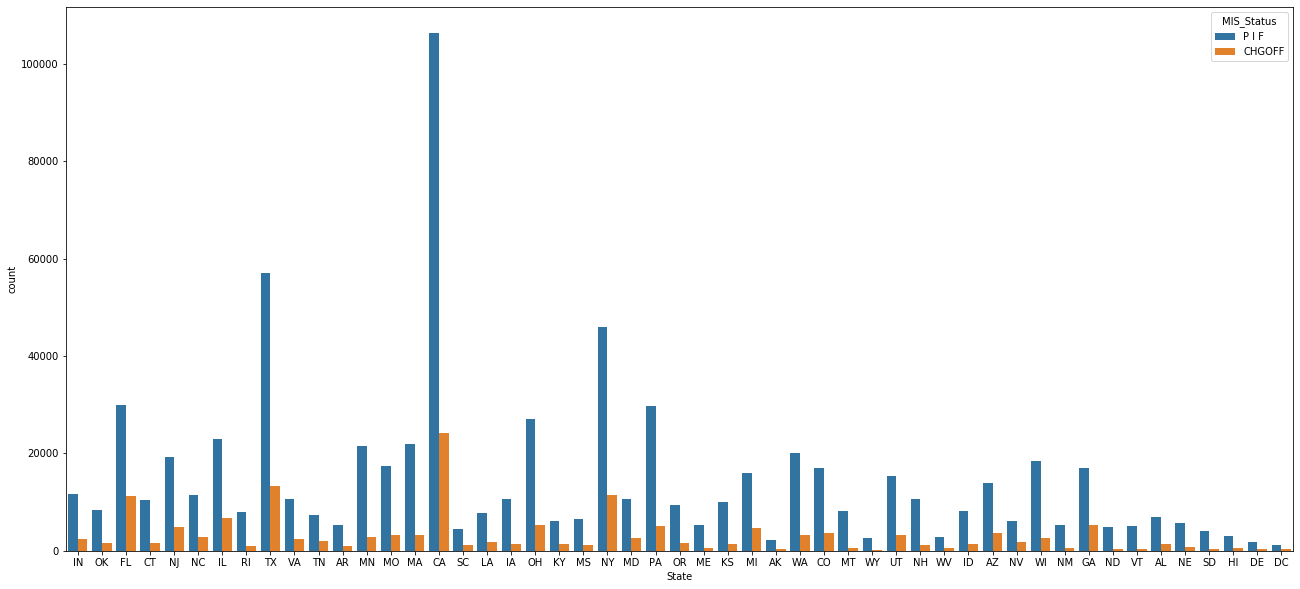

In [439]:
sns.countplot(x='State', hue='MIS_Status', data=df)

In [440]:
pd.crosstab(df['MIS_Status'], df['ApprovalFY'])

ApprovalFY,1966,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,1980,1981,1982,1983,1984,1994,1995,1996,2004,2005
MIS_Status,,,,,,,,,,,,,,,,,,,,,
CHGOFF,1,3,21,45,36,16,10,10,135,274,...,18,1,1,1,1,277,1296,108,7861,5031
P I F,0,0,4,4,2,2,0,0,4,13,...,0,23,14,6,5,11922,44392,3561,36409,19537


[Text(0, 0, '1997'),
 Text(0, 0, '1980'),
 Text(0, 0, '2006'),
 Text(0, 0, '1998'),
 Text(0, 0, '1999'),
 Text(0, 0, '2000'),
 Text(0, 0, '2001'),
 Text(0, 0, '1972'),
 Text(0, 0, '2003'),
 Text(0, 0, '2004'),
 Text(0, 0, '1978'),
 Text(0, 0, '1979'),
 Text(0, 0, '1981'),
 Text(0, 0, '2005'),
 Text(0, 0, '1982'),
 Text(0, 0, '1966'),
 Text(0, 0, '1983'),
 Text(0, 0, '1973'),
 Text(0, 0, '1984'),
 Text(0, 0, '2007'),
 Text(0, 0, '1985'),
 Text(0, 0, '1986'),
 Text(0, 0, '1987'),
 Text(0, 0, '2008'),
 Text(0, 0, '1988'),
 Text(0, 0, '2009'),
 Text(0, 0, '1989'),
 Text(0, 0, '1991'),
 Text(0, 0, '1990'),
 Text(0, 0, '1974'),
 Text(0, 0, '2010'),
 Text(0, 0, '2011'),
 Text(0, 0, '1992'),
 Text(0, 0, '1993'),
 Text(0, 0, '2002'),
 Text(0, 0, '2012'),
 Text(0, 0, '2013'),
 Text(0, 0, '1994'),
 Text(0, 0, '2014'),
 Text(0, 0, '1975'),
 Text(0, 0, '1977'),
 Text(0, 0, '1976'),
 Text(0, 0, '2004'),
 Text(0, 0, '1994'),
 Text(0, 0, '1979'),
 Text(0, 0, '1976'),
 Text(0, 0, '1975'),
 Text(0, 0, '

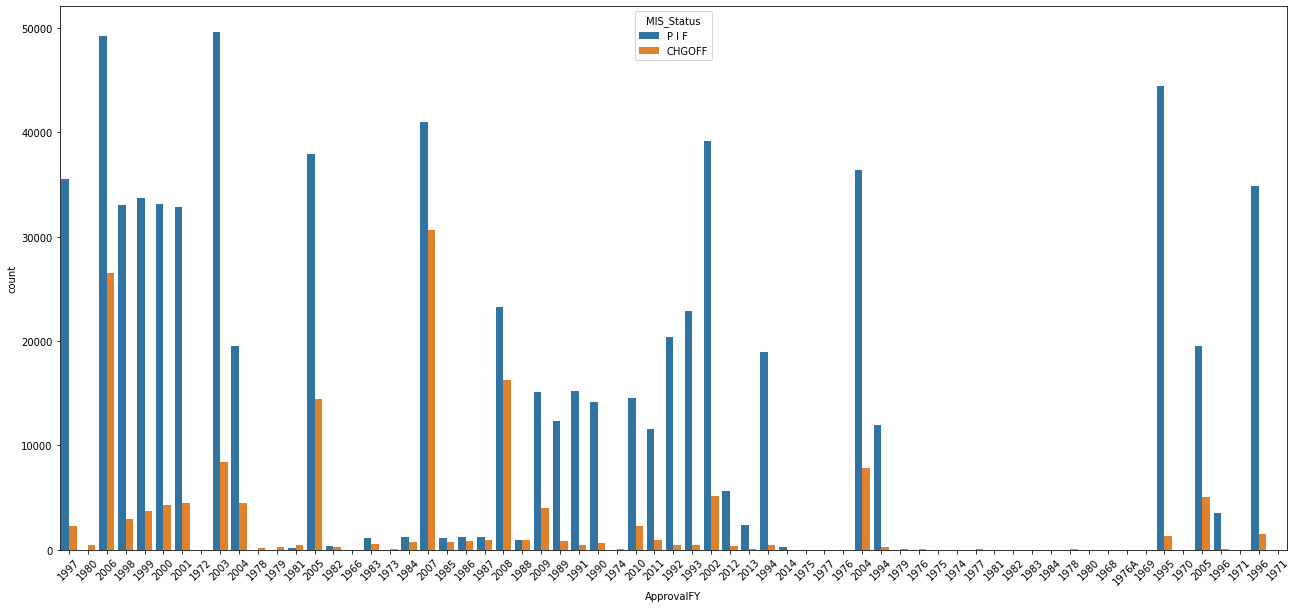

In [441]:
chart=sns.countplot(x='ApprovalFY', hue='MIS_Status', data=df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

In [442]:
pd.crosstab(df['MIS_Status'], df['ChgOffDate'].str[-2:])

ChgOffDate,00,01,02,03,04,05,06,07,08,09,...,90,91,92,93,94,95,96,97,98,99
MIS_Status,,,,,,,,,,,,,,,,,,,,,
CHGOFF,484,2475,2799,3059,2000,3039,11269,7297,18304,18995,...,1560,2209,737,619,476,360,479,573,504,550
P I F,46,60,84,68,63,106,203,213,621,934,...,34,31,42,21,25,32,42,62,58,59


[Text(0, 0, '91'),
 Text(0, 0, '02'),
 Text(0, 0, '89'),
 Text(0, 0, '14'),
 Text(0, 0, '05'),
 Text(0, 0, '11'),
 Text(0, 0, '10'),
 Text(0, 0, '08'),
 Text(0, 0, '13'),
 Text(0, 0, '01'),
 Text(0, 0, '03'),
 Text(0, 0, '98'),
 Text(0, 0, '04'),
 Text(0, 0, '06'),
 Text(0, 0, '12'),
 Text(0, 0, '09'),
 Text(0, 0, '07'),
 Text(0, 0, '90'),
 Text(0, 0, '92'),
 Text(0, 0, '00'),
 Text(0, 0, '88'),
 Text(0, 0, '94'),
 Text(0, 0, '99'),
 Text(0, 0, '95'),
 Text(0, 0, '93'),
 Text(0, 0, '96'),
 Text(0, 0, '97'),
 Text(0, 0, '26')]

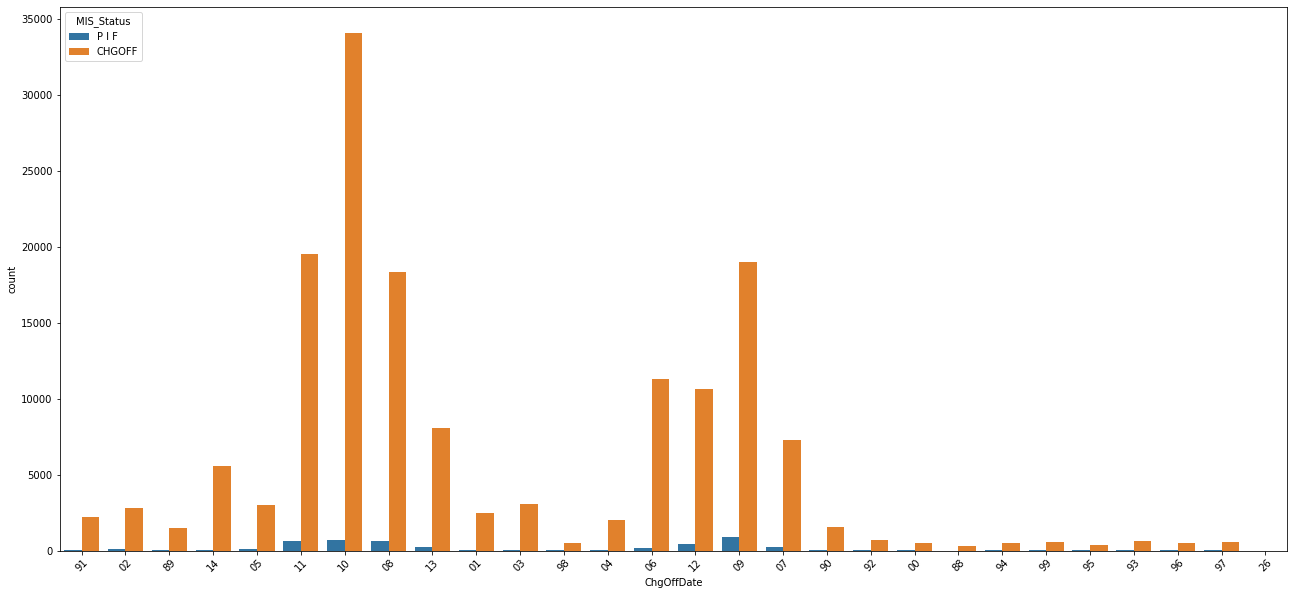

In [443]:
chart=sns.countplot(x= df['ChgOffDate'].str[-2:], hue='MIS_Status', data=df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

# Large Spike of Default 'ChgOffDate' in 2008 to 2010 during the world economic recession compared to other years.

In [444]:
pd.crosstab(df['MIS_Status'], df['NAICS'])

NAICS,0,11,21,22,23,31,42,44,45,48,...,53,54,55,56,61,62,71,72,81,92
MIS_Status,,,,,,,,,,,,,,,,,,,,,
CHGOFF,16799,812,157,94,15463,10438,9480,18938,9930,5431,...,3904,12957,26,7661,1552,5736,3013,14882,14229,35
P I F,184868,8183,1694,568,51029,57465,39193,65629,32478,14767,...,9684,54965,230,24868,4849,49528,11603,52629,58166,192


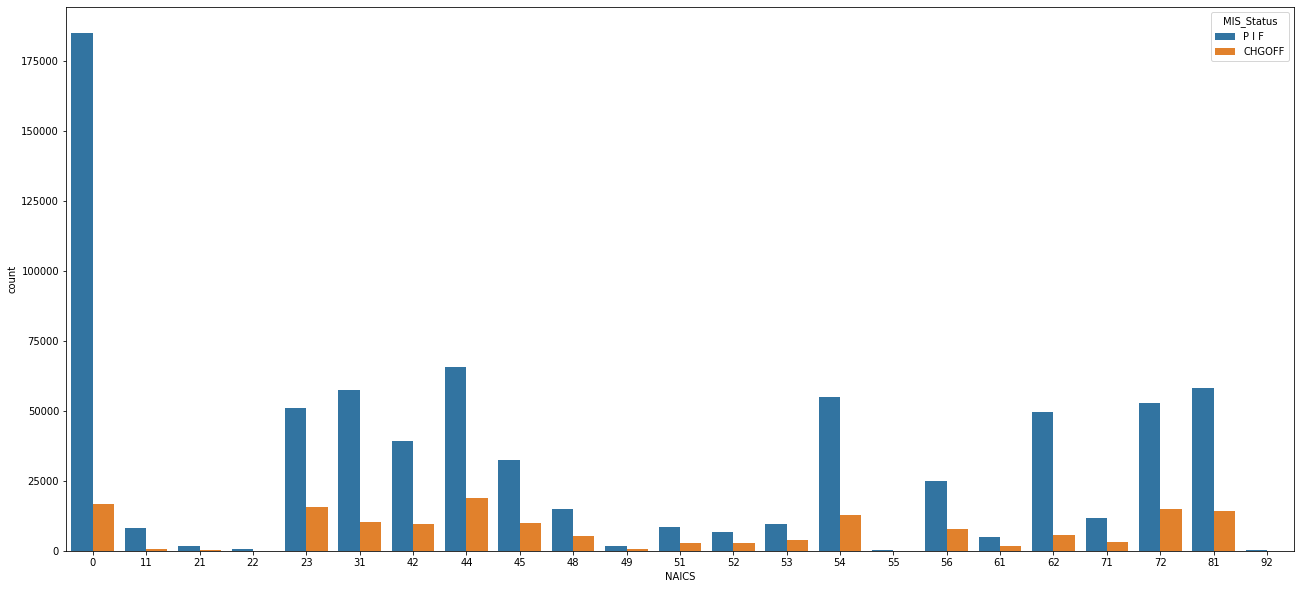

In [445]:
sns.countplot(x='NAICS', hue='MIS_Status', data=df)

In [446]:
pd.crosstab(df['MIS_Status'], df['NoEmp'])

NoEmp,1,2,3
MIS_Status,,,
CHGOFF,155838,1220,500
P I F,714040,17504,8065


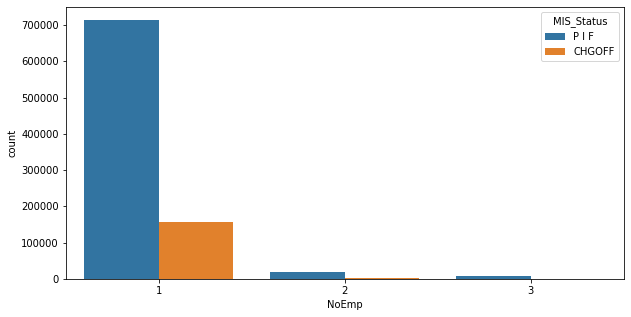

In [447]:
plt.figure(figsize=(10,5))
sns.countplot(x='NoEmp', hue='MIS_Status', data=df)

In [448]:
pd.crosstab(df['MIS_Status'], df['NewExist'])

NewExist,0,1,2
MIS_Status,,,
CHGOFF,77,110114,47367
P I F,1085,533332,205192


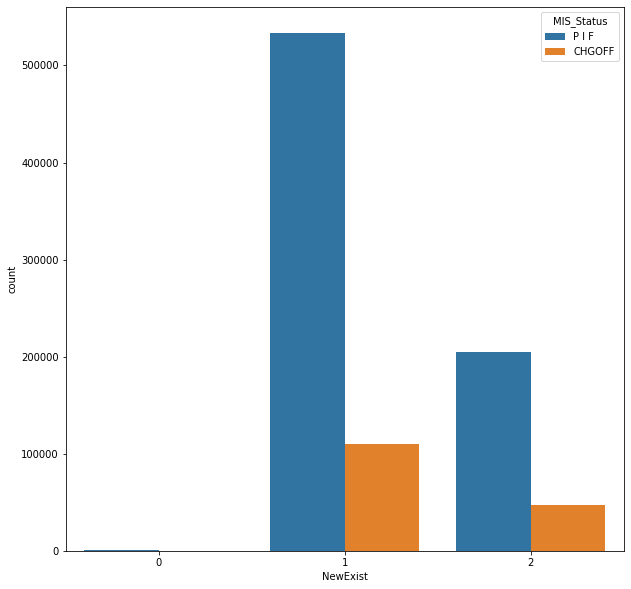

In [449]:
plt.figure(figsize=(10,10))
sns.countplot(x='NewExist', hue='MIS_Status', data=df)

In [450]:
pd.crosstab(df['MIS_Status'], df['FranchiseCode'])

FranchiseCode,1,2
MIS_Status,,
CHGOFF,149698,7860
P I F,695737,43872


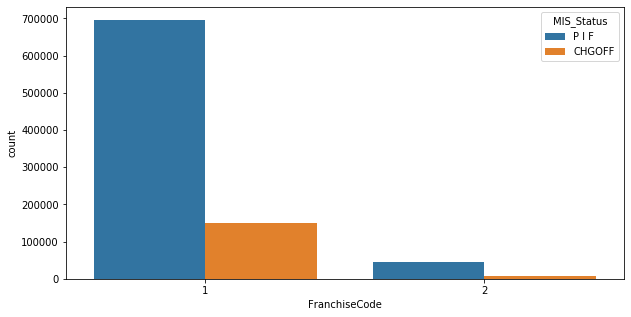

In [451]:
plt.figure(figsize=(10,5))
sns.countplot(x='FranchiseCode', hue='MIS_Status', data=df)

In [452]:
pd.crosstab(df['MIS_Status'], df['UrbanRural'])

UrbanRural,0,1,2
MIS_Status,,,
CHGOFF,22978,114867,19713
P I F,299848,354414,85347


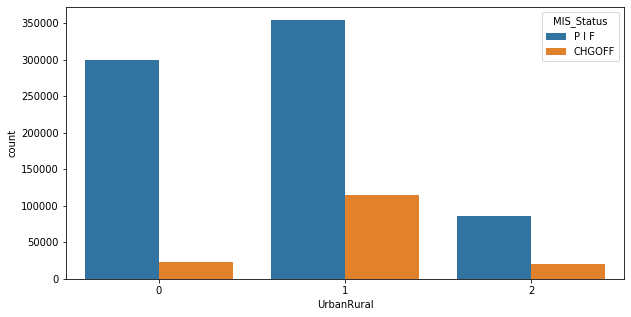

In [453]:
plt.figure(figsize=(10,5))
sns.countplot(x='UrbanRural', hue='MIS_Status', data=df)

In [454]:
pd.crosstab(df['MIS_Status'], df['RevLineCr'])

RevLineCr,0,N,Y
MIS_Status,,,
CHGOFF,45167,61401,50990
P I F,232088,357851,149670


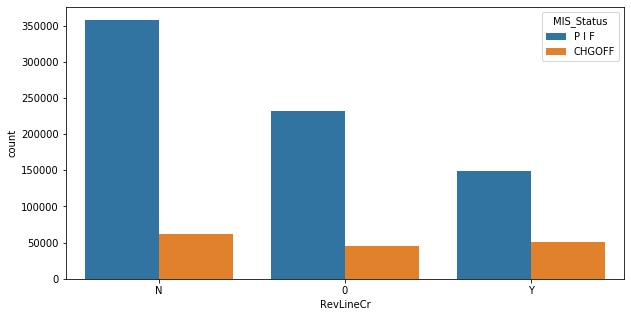

In [455]:
plt.figure(figsize=(10,5))
sns.countplot(x='RevLineCr', hue='MIS_Status', data=df)

In [456]:
pd.crosstab(df['MIS_Status'], df['LowDoc'])

LowDoc,0,N,Y
MIS_Status,,,
CHGOFF,1577,146077,9904
P I F,4422,634920,100267


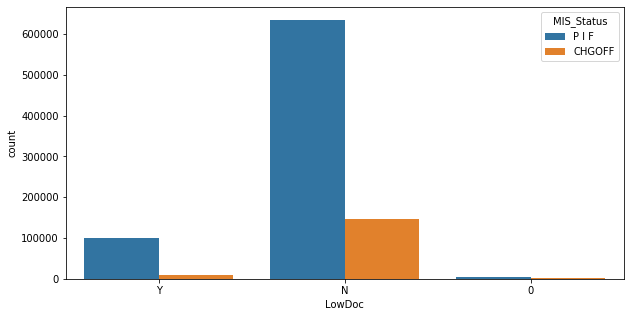

In [457]:
plt.figure(figsize=(10,5))
sns.countplot(x='LowDoc', hue='MIS_Status', data=df)

In [458]:
df.describe()

,Term,CreateJob,RetainedJob,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
count,897167.00,897167.00,897167.00,897167.00,897167.00,897167.00,897167.00,897167.00
mean,110.85,8.44,10.81,201598.03,3.00,13527.21,193059.52,149780.70
std,78.90,236.95,237.38,287806.62,1443.77,65209.86,283433.11,228559.98
min,0.00,0.00,0.00,4000.00,0.00,0.00,1000.00,500.00
25%,60.00,0.00,0.00,42492.00,0.00,0.00,35000.00,21250.00
50%,84.00,0.00,1.00,100000.00,0.00,0.00,90000.00,62050.00
75%,120.00,1.00,4.00,239000.00,0.00,0.00,225000.00,175000.00
max,569.00,8800.00,9500.00,11446325.00,996262.00,3512596.00,5472000.00,5472000.00


In [459]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 897167 entries, 1000014003 to 9996003010
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Name               897153 non-null  object 
 1   City               897137 non-null  object 
 2   State              897154 non-null  object 
 3   Zip                897167 non-null  object 
 4   Bank               895661 non-null  object 
 5   BankState          895654 non-null  object 
 6   NAICS              897167 non-null  object 
 7   ApprovalDate       897167 non-null  object 
 8   ApprovalFY         897167 non-null  object 
 9   Term               897167 non-null  int64  
 10  NoEmp              897167 non-null  object 
 11  NewExist           897167 non-null  object 
 12  CreateJob          897167 non-null  int64  
 13  RetainedJob        897167 non-null  int64  
 14  FranchiseCode      897167 non-null  object 
 15  UrbanRural         897167 non-null  ob

In [460]:
df['MIS_Status'] = df['MIS_Status'].astype(str)
df['MIS_Status'] = df['MIS_Status'].str.replace('CHGOFF', '1').str.replace('P I F', '0')

In [461]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 897167 entries, 1000014003 to 9996003010
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Name               897153 non-null  object 
 1   City               897137 non-null  object 
 2   State              897154 non-null  object 
 3   Zip                897167 non-null  object 
 4   Bank               895661 non-null  object 
 5   BankState          895654 non-null  object 
 6   NAICS              897167 non-null  object 
 7   ApprovalDate       897167 non-null  object 
 8   ApprovalFY         897167 non-null  object 
 9   Term               897167 non-null  int64  
 10  NoEmp              897167 non-null  object 
 11  NewExist           897167 non-null  object 
 12  CreateJob          897167 non-null  int64  
 13  RetainedJob        897167 non-null  int64  
 14  FranchiseCode      897167 non-null  object 
 15  UrbanRural         897167 non-null  ob

# Categorical variables correlation with target variable 

In [462]:
import scipy.stats as ss
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

cramers_v(df['NAICS'], df['MIS_Status'])

0.16550169361071818

In [463]:
cramers_v(df['NoEmp'], df['MIS_Status'])

0.05240803349070167

In [464]:
cramers_v(df['NewExist'], df['MIS_Status'])

0.021936490649659003

In [465]:
cramers_v(df['FranchiseCode'], df['MIS_Status'])

0.015352459146942268

In [466]:
cramers_v(df['UrbanRural'], df['MIS_Status'])

0.2109582244101122

In [467]:
cramers_v(df['RevLineCr'], df['MIS_Status'])

0.11227786155409984

In [468]:
cramers_v(df['LowDoc'], df['MIS_Status'])

0.08582817536731799

In [642]:
cramers_v(df['BankState'], df['MIS_Status'])

0.19805370348734885

In [643]:
cramers_v(df['Bank'], df['MIS_Status'])

0.3277169687216631

In [471]:
cramers_v(df['City'], df['MIS_Status'])

0.18206894269169388

In [472]:
cramers_v(df['ApprovalFY'], df['MIS_Status'])

0.36665089186006006

In [644]:
cramers_v(df['State'], df['MIS_Status'])

0.11139094070989863

# Numerical variables correlation.

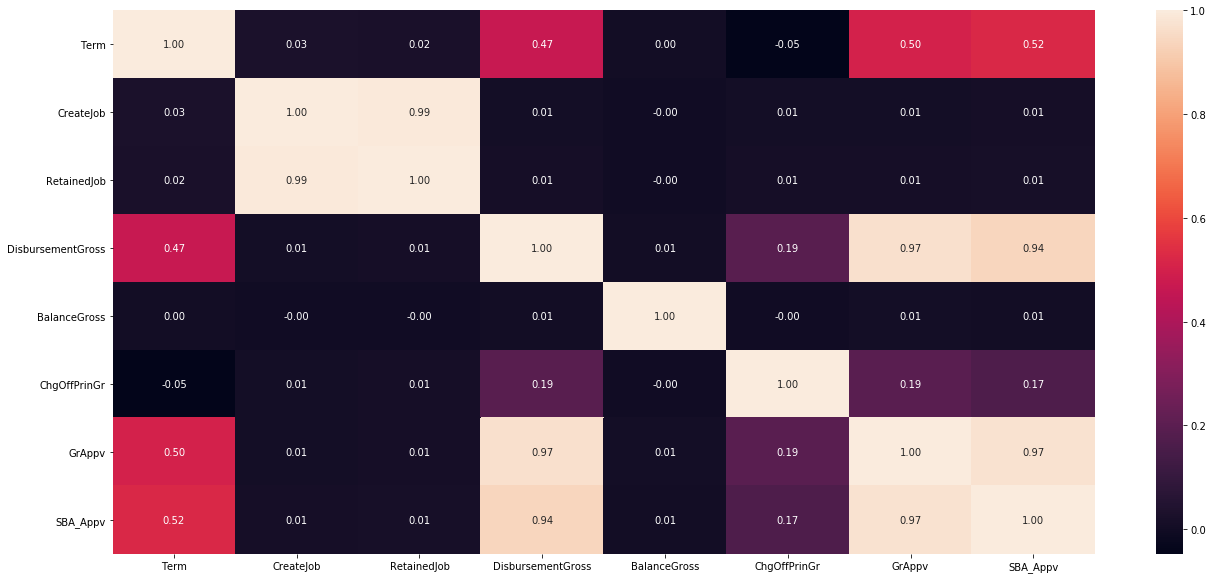

In [474]:
sns.heatmap(df.corr(), annot=True, fmt=".2f")

# Very strong correlation between ('GrAppv','SBA_Appv','DisbursementGross')

# Multivariate Analysis on box plot

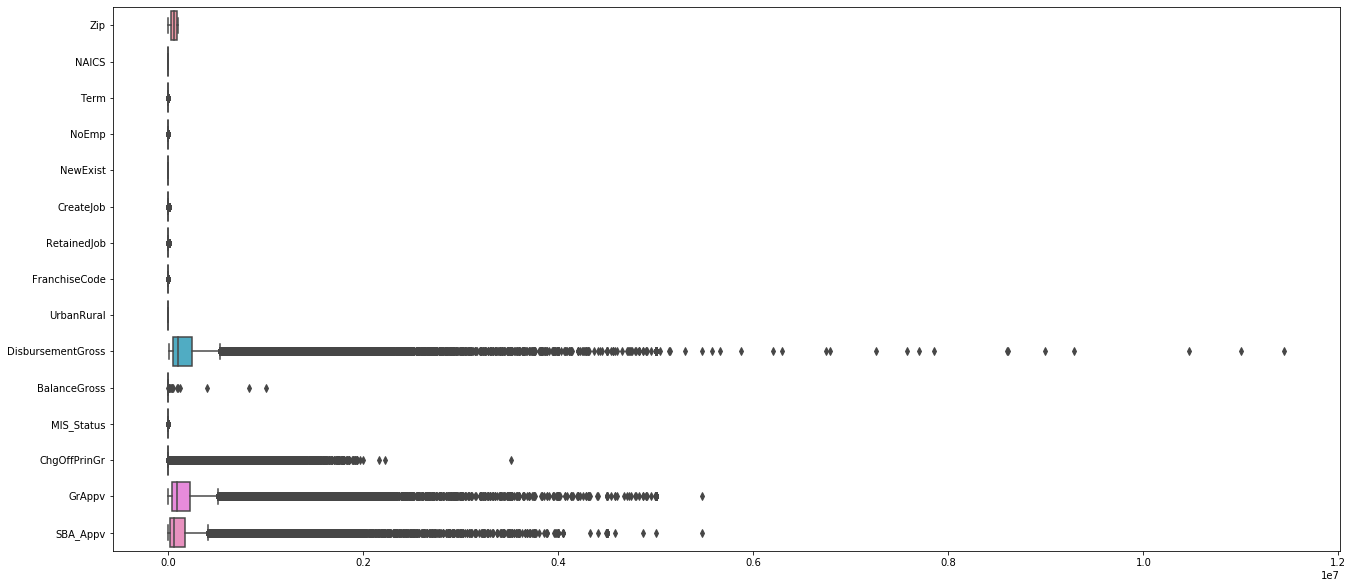

In [475]:
sns.boxplot(data = df, orient = "h")
plt.show()

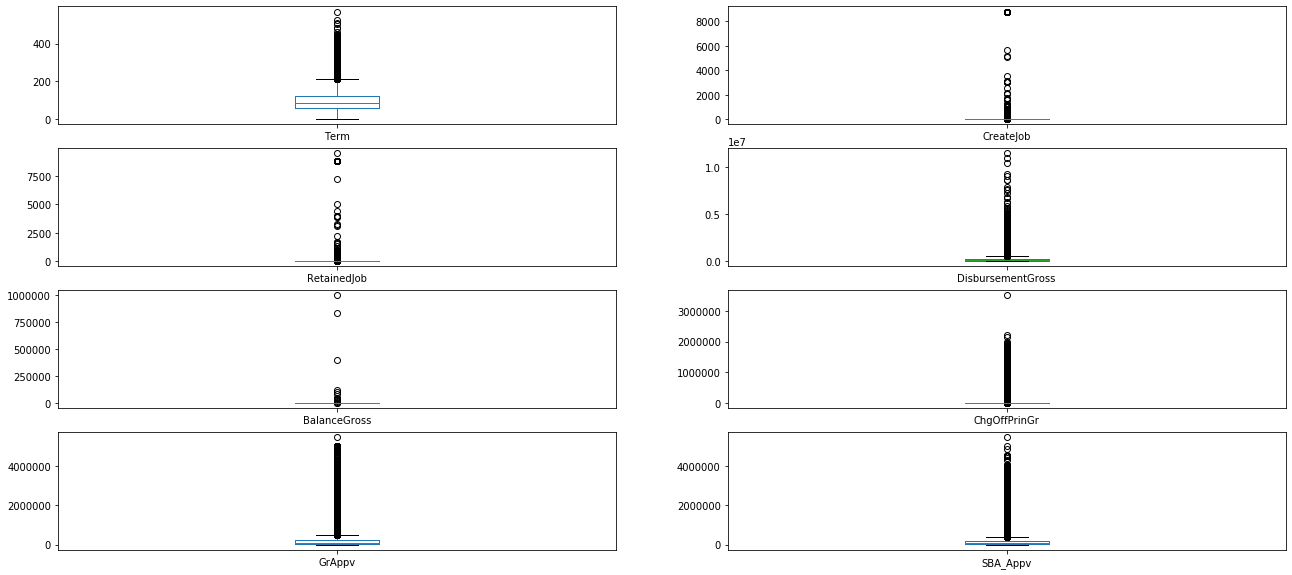

In [476]:
df.plot(kind='box', subplots=True, layout=(4,2), sharex=False, sharey=False)
plt.show()

# Taking demographical columns out of the data before using pairplot multivariate visualization.

In [645]:
df1= df[['City','State','Bank','BankState','NAICS', 'NoEmp', 'NewExist','FranchiseCode', 'UrbanRural','RevLineCr', 'LowDoc', 'Term','CreateJob','RetainedJob','DisbursementGross','BalanceGross','ChgOffPrinGr','GrAppv','SBA_Appv','MIS_Status']]

In [646]:
df1.head(7)

,City,State,Bank,BankState,NAICS,NoEmp,NewExist,FranchiseCode,UrbanRural,RevLineCr,LowDoc,Term,CreateJob,RetainedJob,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv,MIS_Status
LoanNr_ChkDgt,,,,,,,,,,,,,,,,,,,,
1000014003,EVANSVILLE,IN,FIFTH THIRD BANK,OH,45,1,2,1,0,N,Y,84,0,0,60000.00,0.00,0.00,60000.00,48000.00,0
1000024006,NEW PARIS,IN,1ST SOURCE BANK,IN,72,1,2,1,0,N,Y,60,0,0,40000.00,0.00,0.00,40000.00,32000.00,0
1000034009,BLOOMINGTON,IN,GRANT COUNTY STATE BANK,IN,62,1,1,1,0,N,N,180,0,0,287000.00,0.00,0.00,287000.00,215250.00,0
1000044001,BROKEN ARROW,OK,1ST NATL BK & TR CO OF BROKEN,OK,0,1,1,1,0,N,Y,60,0,0,35000.00,0.00,0.00,35000.00,28000.00,0
1000054004,ORLANDO,FL,FLORIDA BUS. DEVEL CORP,FL,0,1,1,1,0,N,N,240,7,7,229000.00,0.00,0.00,229000.00,229000.00,0
1000084002,PLAINVILLE,CT,"TD BANK, NATIONAL ASSOCIATION",DE,31,1,1,1,0,N,N,120,0,0,517000.00,0.00,0.00,517000.00,387750.00,0
1000093009,UNION,NJ,WELLS FARGO BANK NATL ASSOC,SD,0,1,2,1,0,N,N,45,0,0,600000.00,0.00,208959.00,600000.00,499998.00,1


In [647]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 895613 entries, 1000014003 to 9996003010
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   City               895613 non-null  object 
 1   State              895613 non-null  object 
 2   Bank               895613 non-null  object 
 3   BankState          895613 non-null  object 
 4   NAICS              895613 non-null  object 
 5   NoEmp              895613 non-null  object 
 6   NewExist           895613 non-null  object 
 7   FranchiseCode      895613 non-null  object 
 8   UrbanRural         895613 non-null  object 
 9   RevLineCr          895613 non-null  object 
 10  LowDoc             895613 non-null  object 
 11  Term               895613 non-null  int64  
 12  CreateJob          895613 non-null  int64  
 13  RetainedJob        895613 non-null  int64  
 14  DisbursementGross  895613 non-null  float64
 15  BalanceGross       895613 non-null  fl

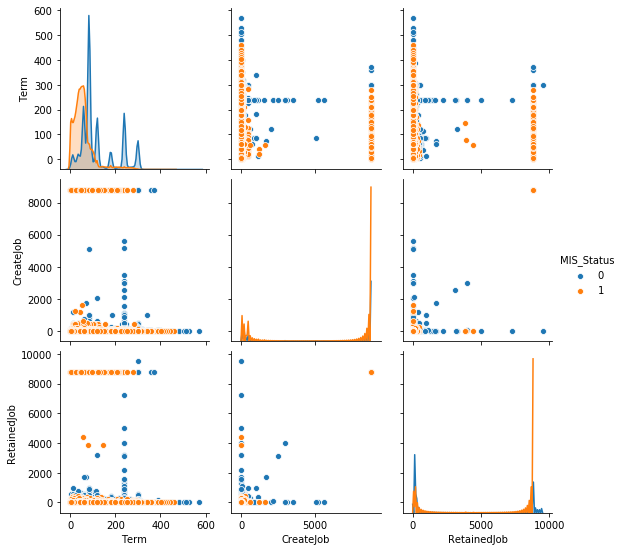

In [480]:
sns.pairplot(df1, vars=['Term','CreateJob','RetainedJob'], hue='MIS_Status', diag_kind = 'kde')

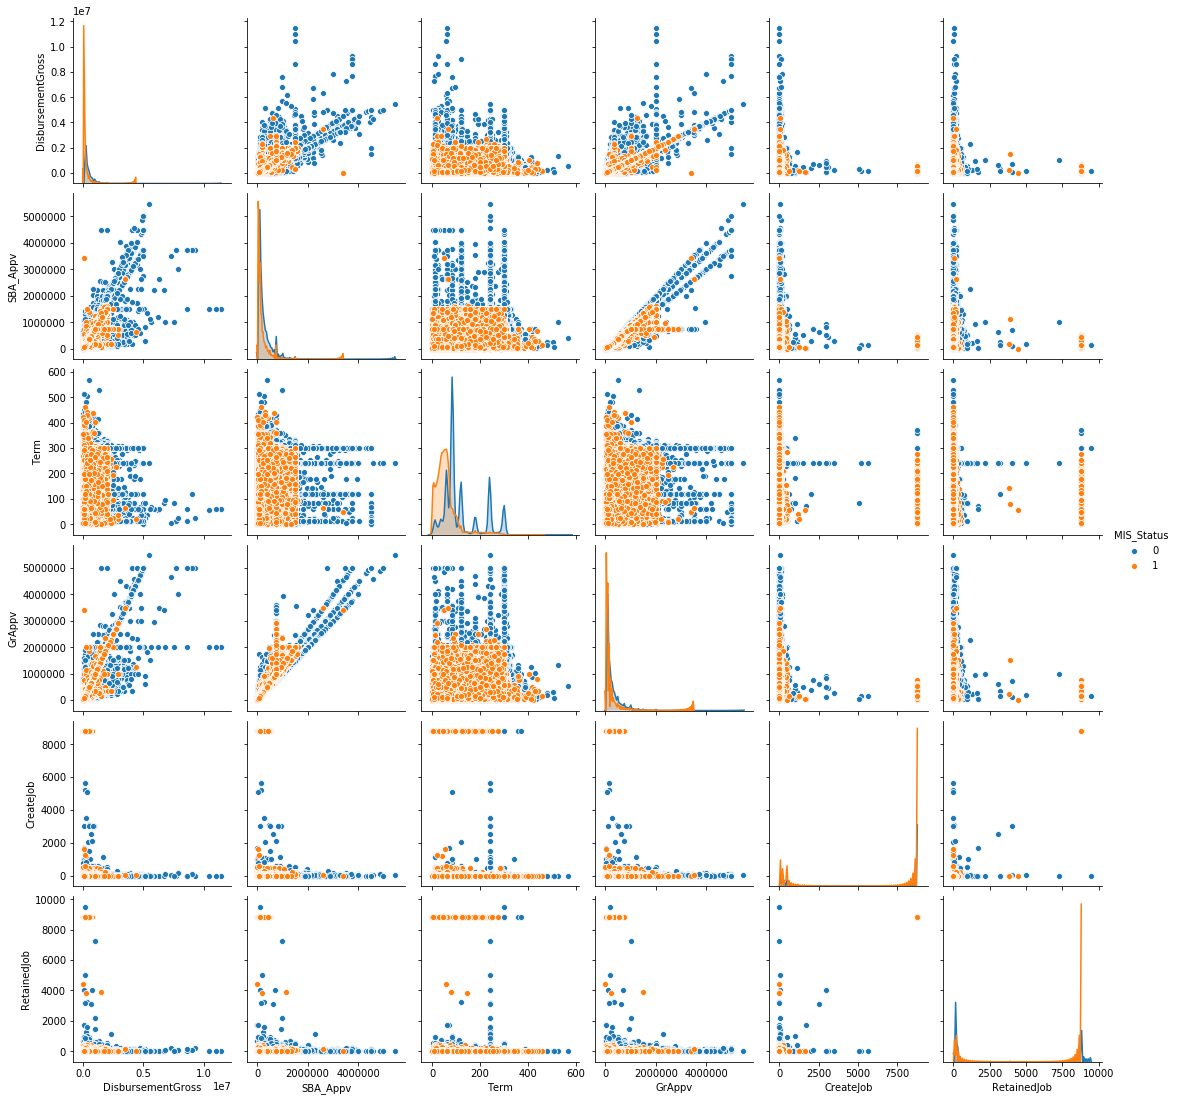

In [481]:
sns.pairplot(df1, vars=['DisbursementGross','SBA_Appv','Term','GrAppv','CreateJob','RetainedJob'], hue='MIS_Status', diag_kind = 'kde')

# 1- Since 'GrAppv', 'DisbursementGross' and 'SBA_Appv' are strongly positive correlated then only GRAppv will be kept in the new data.  2- 'BalanceGros s' is removed as well as it doesn't add any new value to the analysis. 3-'ChgOffPrinGr' represents the remaining loan before default which won't be needed in the prediction stage.  

In [648]:
df2= df[['City','State','Bank','BankState','NAICS', 'NoEmp', 'NewExist','FranchiseCode', 'UrbanRural','RevLineCr', 'LowDoc', 'Term','CreateJob','RetainedJob','GrAppv','MIS_Status']]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 895613 entries, 1000014003 to 9996003010
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   City           895613 non-null  object 
 1   State          895613 non-null  object 
 2   Bank           895613 non-null  object 
 3   BankState      895613 non-null  object 
 4   NAICS          895613 non-null  object 
 5   NoEmp          895613 non-null  object 
 6   NewExist       895613 non-null  object 
 7   FranchiseCode  895613 non-null  object 
 8   UrbanRural     895613 non-null  object 
 9   RevLineCr      895613 non-null  object 
 10  LowDoc         895613 non-null  object 
 11  Term           895613 non-null  int64  
 12  CreateJob      895613 non-null  int64  
 13  RetainedJob    895613 non-null  int64  
 14  GrAppv         895613 non-null  float64
 15  MIS_Status     895613 non-null  object 
dtypes: float64(1), int64(3), object(12)
memory usage: 116.2+ MB


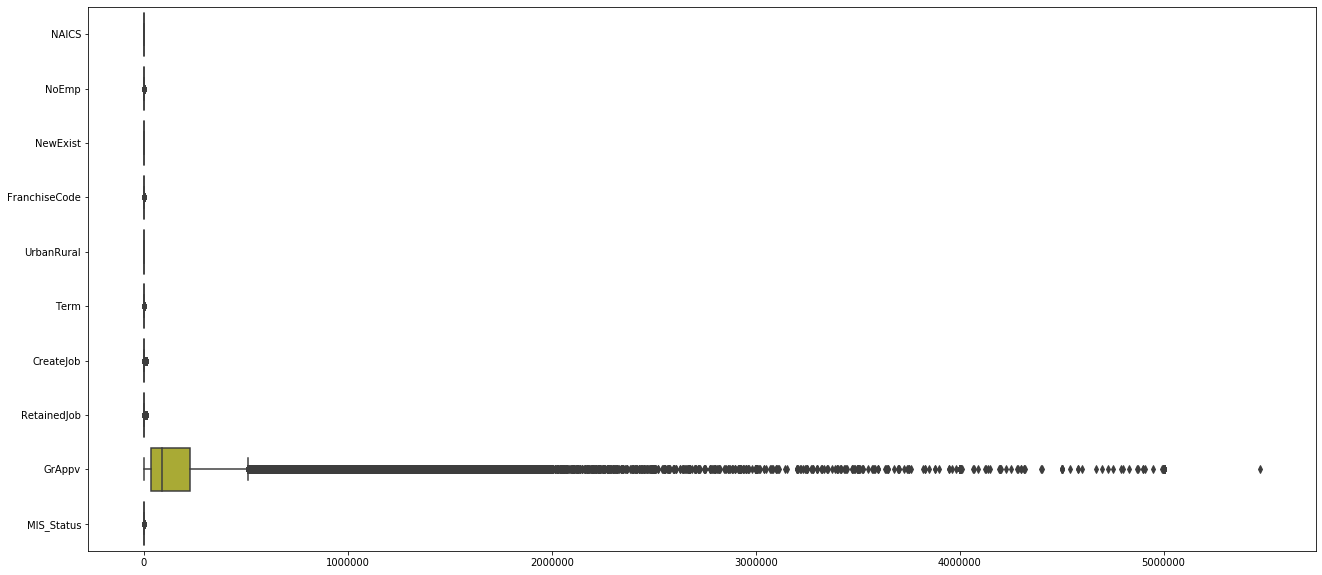

In [483]:
sns.boxplot(data = df2, orient = "h")
plt.show()

In [649]:
df2.describe()

,Term,CreateJob,RetainedJob,GrAppv
count,895613.00,895613.00,895613.00,895613.00
mean,110.85,8.42,10.79,193078.98
std,78.90,236.43,236.86,283570.11
min,0.00,0.00,0.00,1000.00
25%,60.00,0.00,0.00,35000.00
50%,84.00,0.00,1.00,90000.00
75%,120.00,1.00,4.00,225000.00
max,569.00,8800.00,9500.00,5472000.00


# Removing Outliers from the selected numerical variables 

In [650]:
Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Term              60.00
CreateJob          1.00
RetainedJob        4.00
GrAppv        190000.00
dtype: float64


In [651]:
df2_out = df2[~((df2 < (Q1 - 1.5 * IQR)) |(df2 > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df2_out.shape)

(584311, 16)


In [652]:
df2_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584311 entries, 1000014003 to 9996003010
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   City           584311 non-null  object 
 1   State          584311 non-null  object 
 2   Bank           584311 non-null  object 
 3   BankState      584311 non-null  object 
 4   NAICS          584311 non-null  object 
 5   NoEmp          584311 non-null  object 
 6   NewExist       584311 non-null  object 
 7   FranchiseCode  584311 non-null  object 
 8   UrbanRural     584311 non-null  object 
 9   RevLineCr      584311 non-null  object 
 10  LowDoc         584311 non-null  object 
 11  Term           584311 non-null  int64  
 12  CreateJob      584311 non-null  int64  
 13  RetainedJob    584311 non-null  int64  
 14  GrAppv         584311 non-null  float64
 15  MIS_Status     584311 non-null  object 
dtypes: float64(1), int64(3), object(12)
memory usage: 75.8+ MB


In [653]:
df2_out.MIS_Status.value_counts()

0    466708
1    117603
Name: MIS_Status, dtype: int64

In [654]:
df2_out['MIS_Status'].value_counts(normalize=True)

0   0.80
1   0.20
Name: MIS_Status, dtype: float64

In [490]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Dealing with the data imbalance by undersampling

In [655]:
count_class_0, count_class_1= df2_out['MIS_Status'].value_counts()

In [656]:
df2_out_class_0 = df2_out[df2_out['MIS_Status'] == '0']
df2_out_class_1 = df2_out[df2_out['MIS_Status'] == '1']

In [657]:
df2_out_class_0['MIS_Status'].value_counts()

0    466708
Name: MIS_Status, dtype: int64

In [658]:
df2_out_class_0_us = df2_out_class_0.sample(count_class_1)

In [659]:
df2_out_us = pd.concat([df2_out_class_0_us, df2_out_class_1], axis=0)
df2_out_us['MIS_Status'].value_counts()

0    117603
1    117603
Name: MIS_Status, dtype: int64

In [660]:
df2_out_us.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235206 entries, 4466353010 to 9995973006
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   City           235206 non-null  object 
 1   State          235206 non-null  object 
 2   Bank           235206 non-null  object 
 3   BankState      235206 non-null  object 
 4   NAICS          235206 non-null  object 
 5   NoEmp          235206 non-null  object 
 6   NewExist       235206 non-null  object 
 7   FranchiseCode  235206 non-null  object 
 8   UrbanRural     235206 non-null  object 
 9   RevLineCr      235206 non-null  object 
 10  LowDoc         235206 non-null  object 
 11  Term           235206 non-null  int64  
 12  CreateJob      235206 non-null  int64  
 13  RetainedJob    235206 non-null  int64  
 14  GrAppv         235206 non-null  float64
 15  MIS_Status     235206 non-null  object 
dtypes: float64(1), int64(3), object(12)
memory usage: 30.5+ MB


In [661]:
df2_out_us.head(5)

,City,State,Bank,BankState,NAICS,NoEmp,NewExist,FranchiseCode,UrbanRural,RevLineCr,LowDoc,Term,CreateJob,RetainedJob,GrAppv,MIS_Status
LoanNr_ChkDgt,,,,,,,,,,,,,,,,
4466353010,PARIS,TN,MCKENZIE BANKING COMPANY,TN,0,1,1,1,0,N,N,84,0,0,125000.00,0
4891994000,MT OLIVE,MS,PEOPLES BANK,MS,11,1,1,1,2,N,N,180,0,0,280000.00,0
3668564003,HUTCHINSON,MN,CITIZENS BANK & TRUST CO,MN,0,1,1,1,2,N,N,180,0,0,380000.00,0
8869813009,CHARLOTTE,NC,BRANCH BK. & TR CO,NC,0,1,1,1,0,N,Y,60,0,0,71000.00,0
6459004007,LOS GATOS,CA,VISION ONE CU,CA,62,1,1,1,1,N,N,120,0,0,220000.00,0


In [662]:
df2_out_us['NAICS'].describe()

count     235206
unique        23
top            0
freq       42962
Name: NAICS, dtype: object

In [663]:
df2_out_us['NAICS'].value_counts()

0     42962
44    25770
81    20185
23    20131
54    19903
31    15228
45    14584
42    13850
72    13019
62    11483
56    10102
48     7214
53     4895
71     3737
51     3731
52     3196
11     2094
61     1796
49      650
21      382
22      182
92       65
55       47
Name: NAICS, dtype: int64

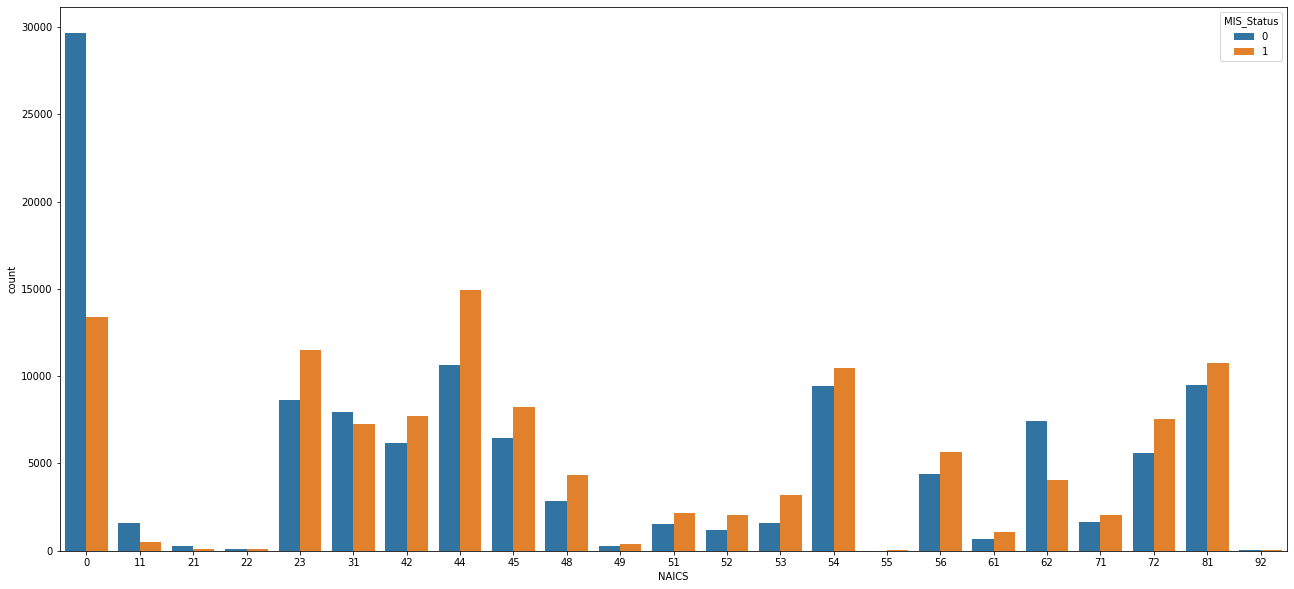

In [500]:
sns.countplot(x='NAICS', hue='MIS_Status', data=df2_out_us)

# Scaling the numerical columns to unite variance.

In [501]:
from sklearn import preprocessing

In [504]:
min_max_scaler = preprocessing.MinMaxScaler()

In [665]:
df2_out_us.describe(include=['object'])

,City,State,Bank,BankState,NAICS,NoEmp,NewExist,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status
count,235206,235206,235206,235206,235206,235206,235206,235206,235206,235206,235206,235206
unique,18915,51,4405,53,23,3,3,2,3,3,3,2
top,LOS ANGELES,CA,BANK OF AMERICA NATL ASSOC,NC,0,1,1,1,1,N,N,0
freq,3642,30950,33197,30247,42962,232915,165296,224755,137904,103642,199289,117603


In [585]:
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler

In [666]:
df3= df2_out_us[['City','State','Bank','BankState','NAICS', 'NoEmp', 'NewExist','FranchiseCode', 'UrbanRural','RevLineCr', 'LowDoc', 'Term','CreateJob','RetainedJob','GrAppv','MIS_Status']]

In [711]:
df3.to_csv('C:/Users/amr.elshamarka/Desktop/CMKE136 Capstone/SBAnational_final.csv', index=True)

In [667]:
df3.head(5)

,City,State,Bank,BankState,NAICS,NoEmp,NewExist,FranchiseCode,UrbanRural,RevLineCr,LowDoc,Term,CreateJob,RetainedJob,GrAppv,MIS_Status
LoanNr_ChkDgt,,,,,,,,,,,,,,,,
4466353010,PARIS,TN,MCKENZIE BANKING COMPANY,TN,0,1,1,1,0,N,N,84,0,0,125000.00,0
4891994000,MT OLIVE,MS,PEOPLES BANK,MS,11,1,1,1,2,N,N,180,0,0,280000.00,0
3668564003,HUTCHINSON,MN,CITIZENS BANK & TRUST CO,MN,0,1,1,1,2,N,N,180,0,0,380000.00,0
8869813009,CHARLOTTE,NC,BRANCH BK. & TR CO,NC,0,1,1,1,0,N,Y,60,0,0,71000.00,0
6459004007,LOS GATOS,CA,VISION ONE CU,CA,62,1,1,1,1,N,N,120,0,0,220000.00,0


In [534]:
from sklearn.compose import make_column_selector as selector

In [668]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235206 entries, 4466353010 to 9995973006
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   City           235206 non-null  object 
 1   State          235206 non-null  object 
 2   Bank           235206 non-null  object 
 3   BankState      235206 non-null  object 
 4   NAICS          235206 non-null  object 
 5   NoEmp          235206 non-null  object 
 6   NewExist       235206 non-null  object 
 7   FranchiseCode  235206 non-null  object 
 8   UrbanRural     235206 non-null  object 
 9   RevLineCr      235206 non-null  object 
 10  LowDoc         235206 non-null  object 
 11  Term           235206 non-null  int64  
 12  CreateJob      235206 non-null  int64  
 13  RetainedJob    235206 non-null  int64  
 14  GrAppv         235206 non-null  float64
 15  MIS_Status     235206 non-null  object 
dtypes: float64(1), int64(3), object(12)
memory usage: 30.5+ MB


In [669]:
columns_to_encode = ['City','State','Bank','BankState','NAICS', 'NoEmp', 'NewExist', 'FranchiseCode', 'UrbanRural', 'RevLineCr', 'LowDoc']
columns_to_scale  = ['Term', 'CreateJob', 'RetainedJob', 'GrAppv']
scaler = MinMaxScaler()
ohe    = OneHotEncoder(sparse=False)
scaled_columns  = scaler.fit_transform(df3[columns_to_scale]) 
encoded_columns =    ohe.fit_transform(df3[columns_to_encode])

In [671]:
encoded_columns.shape

(235206, 23464)

In [672]:
test2= SelectKBest(chi2, k=1000)
fit3= test2.fit(encoded_columns, df3['MIS_Status'])
features2=fit3.transform(encoded_columns)
scores = pd.DataFrame(fit3.scores_)

In [673]:
features2.shape

(235206, 1000)

In [674]:
features2[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [675]:
processed_data = np.concatenate([scaled_columns, features2], axis=1)

# Vectorized Data ready for modeling. 

In [680]:
processed_data.shape

(235206, 1004)